In [1]:
# Download necessary package
library(ggplot2)

In [3]:
# Define variables for patient data and patient ROI values
data <- "~/scratch//tractoflow_hcp_dwi/linear_regression/UKBB_patient_vals.csv"
data <- read.table(data, sep=',', quote='"', header=T)
patient_data <- "~/scratch//tractoflow_hcp_dwi/UKBB_patient_data.csv"
patient_data <- read.table(patient_data, sep=',', quote='"', header=T)

# Define variable of hypothalamus names
hypo <- c("Atlas_of_the_Human_Hypothalamus_anterior_hypothalamic_area_L", "Atlas_of_the_Human_Hypothalamus_anterior_hypothalamic_area_R", "Atlas_of_the_Human_Hypothalamus_arcuate_hypothalamic_nucleus_L", "Atlas_of_the_Human_Hypothalamus_arcuate_hypothalamic_nucleus_R", "Atlas_of_the_Human_Hypothalamus_dorsal_periventricular_hypothalamic_nucleus_L", "Atlas_of_the_Human_Hypothalamus_dorsal_periventricular_hypothalamic_nucleus_R", "Atlas_of_the_Human_Hypothalamus_dorsomedial_hypothalamic_nucleus_L", "Atlas_of_the_Human_Hypothalamus_dorsomedial_hypothalamic_nucleus_R", "Atlas_of_the_Human_Hypothalamus_lateral_hypothalamus_L", "Atlas_of_the_Human_Hypothalamus_lateral_hypothalamus_R", "Atlas_of_the_Human_Hypothalamus_mammillary_bodies_L", "Atlas_of_the_Human_Hypothalamus_mammillary_bodies_R", "Atlas_of_the_Human_Hypothalamus_medial_preoptic_nucleus_L", "Atlas_of_the_Human_Hypothalamus_medial_preoptic_nucleus_R", "Atlas_of_the_Human_Hypothalamus_paraventricular_nucleus_L", "Atlas_of_the_Human_Hypothalamus_paraventricular_nucleus_R", "Atlas_of_the_Human_Hypothalamus_periventricular_hypothalamic_nucleus_L", "", "Atlas_of_the_Human_Hypothalamus_posterior_hypotahalamic_nucleus_L", "Atlas_of_the_Human_Hypothalamus_posterior_hypotahalamic_nucleus_R", "Atlas_of_the_Human_Hypothalamus_suprachiasmatic_hypothalamic_nucleus_L", "Atlas_of_the_Human_Hypothalamus_suprachiasmatic_hypothalamic_nucleus_R", "Atlas_of_the_Human_Hypothalamus_supraoptic_hypothalamic_nucleus_L", "Atlas_of_the_Human_Hypothalamus_supraoptic_hypothalamic_nucleus_R", "Atlas_of_the_Human_Hypothalamus_tuberomammillary_hypothalamic_nucleus_L", "Atlas_of_the_Human_Hypothalamus_tuberomammillary_hypothalamic_nucleus_R", "Atlas_of_the_Human_Hypothalamus_ventromedial_hypothalamus_L", "Atlas_of_the_Human_Hypothalamus_ventromedial_hypothalamus_R")
patients <- unique(data$eid)

# Subset data frame based on DTI measure
ad_all_data <- data[data$WM_Measure == 'AD', ]
fa_all_data <- data[data$WM_Measure == 'FA', ]
md_all_data <- data[data$WM_Measure == 'MD', ]
rd_all_data <- data[data$WM_Measure == 'RD', ]

# Subset DTI data frame to hypothalamus values
ad_data <- ad_all_data[c("eid", intersect(colnames(ad_all_data), hypo))]
fa_data <- fa_all_data[c("eid", intersect(colnames(fa_all_data), hypo))]
md_data <- md_all_data[c("eid", intersect(colnames(md_all_data), hypo))]
rd_data <- rd_all_data[c("eid", intersect(colnames(rd_all_data), hypo))]

# Calculate average hypothalamus and add column to each DTI data frame
ad_data$full_hypo <- rowMeans(ad_data[, -1], na.rm = TRUE)
fa_data$full_hypo <- rowMeans(fa_data[, -1], na.rm = TRUE)
md_data$full_hypo <- rowMeans(md_data[, -1], na.rm = TRUE)
rd_data$full_hypo <- rowMeans(rd_data[, -1], na.rm = TRUE)

Warning message in file(file, "rt"):
“cannot open file '/home/mtweed/scratch//tractoflow_hcp_dwi/linear_regression/UKBB_patient_vals.csv': No such file or directory”


ERROR: Error in file(file, "rt"): cannot open the connection


In [5]:
# Extract necesary variables from UKBB patient data
subj_data <- patient_data[c("eid", "sex_31.0.0", "age_when_attended_assessment_centre_21003.2.0", "body_mass_index_bmi_21001.2.0", "c.reactive_protein_30710.0.0", "glucose_30740.0.0", "glycated_haemoglobin_hba1c_30750.0.0", "cholesterol_30690.0.0", "hdl_cholesterol_30760.0.0", "ldl_direct_30780.0.0", "triglycerides_30870.0.0", "systolic_blood_pressure_automated_reading_4080.0.1", "diastolic_blood_pressure_automated_reading_4079.0.1")]
ad_subj_data=merge(subj_data, ad_data)
fa_subj_data=merge(subj_data, fa_data)
md_subj_data=merge(subj_data, md_data)
rd_subj_data=merge(subj_data, rd_data)

In [6]:
# Create individual CSV files separated based on DTI metrics
write.csv(ad_subj_data, "scratch/tractoflow_hcp_dwi/linear_regression/UKBB_ad_data.csv")
write.csv(fa_subj_data, "scratch/tractoflow_hcp_dwi/linear_regression/UKBB_fa_data.csv")
write.csv(md_subj_data, "scratch/tractoflow_hcp_dwi/linear_regression/UKBB_md_data.csv")
write.csv(rd_subj_data, "scratch/tractoflow_hcp_dwi/linear_regression/UKBB_rd_data.csv")


Call:
lm(formula = full_hypo ~ body_mass_index_bmi_21001.2.0 + age_when_attended_assessment_centre_21003.2.0 + 
    sex_31.0.0, data = ad_subj_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.00186 -0.00011 -0.00003  0.00006  0.56743 

Coefficients:
                                                Estimate Std. Error t value
(Intercept)                                    9.740e-04  2.467e-04   3.948
body_mass_index_bmi_21001.2.0                 -9.704e-07  5.805e-06  -0.167
age_when_attended_assessment_centre_21003.2.0  1.008e-05  3.015e-06   3.343
sex_31.0.0Male                                 9.381e-05  4.589e-05   2.044
                                              Pr(>|t|)    
(Intercept)                                   7.89e-05 ***
body_mass_index_bmi_21001.2.0                 0.867247    
age_when_attended_assessment_centre_21003.2.0 0.000831 ***
sex_31.0.0Male                                0.040942 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’

Warning message:
“Removed 1077 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 1077 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 26025 rows containing missing values (`geom_text()`).”


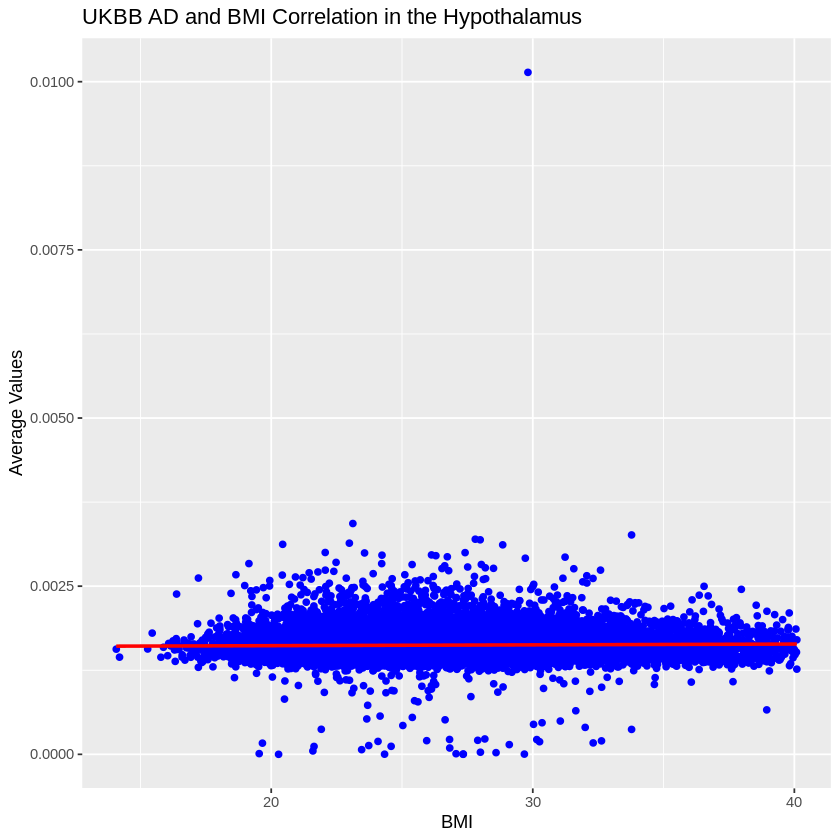

In [24]:
# Linear regression for AD and BMI in the Hypothalamus
lm <- lm(full_hypo ~ body_mass_index_bmi_21001.2.0+age_when_attended_assessment_centre_21003.2.0+sex_31.0.0, data=ad_subj_data)
ad_summary <- summary(lm)
ad_summary
point_count <- nrow(ad_subj_data)
ggplot(ad_subj_data[which(ad_subj_data$full_hypo>0 & ad_subj_data$full_hypo<.2),], aes(x = body_mass_index_bmi_21001.2.0, y = full_hypo)) +
  geom_point(color = "blue") +
  geom_smooth(method = "lm", formula = y ~ x, se = TRUE, color = "red") +
  geom_text(aes(x = max(body_mass_index_bmi_21001.2.0), y = max(full_hypo)),
            label = paste("N =", point_count),
            hjust = 1, vjust = 1, color = "black") +
  labs(title = "UKBB AD and BMI Correlation in the Hypothalamus", x = "BMI", y = "Average Values")


Call:
lm(formula = full_hypo ~ body_mass_index_bmi_21001.2.0 + age_when_attended_assessment_centre_21003.2.0 + 
    sex_31.0.0, data = fa_subj_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.19107 -0.01500  0.00119  0.01733  0.83057 

Coefficients:
                                                Estimate Std. Error t value
(Intercept)                                    1.622e-01  2.275e-03   71.31
body_mass_index_bmi_21001.2.0                  1.149e-03  5.354e-05   21.46
age_when_attended_assessment_centre_21003.2.0 -2.747e-04  2.781e-05   -9.88
sex_31.0.0Male                                -4.234e-03  4.232e-04  -10.00
                                              Pr(>|t|)    
(Intercept)                                     <2e-16 ***
body_mass_index_bmi_21001.2.0                   <2e-16 ***
age_when_attended_assessment_centre_21003.2.0   <2e-16 ***
sex_31.0.0Male                                  <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’

Warning message:
“Removed 1077 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 1077 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 26028 rows containing missing values (`geom_text()`).”


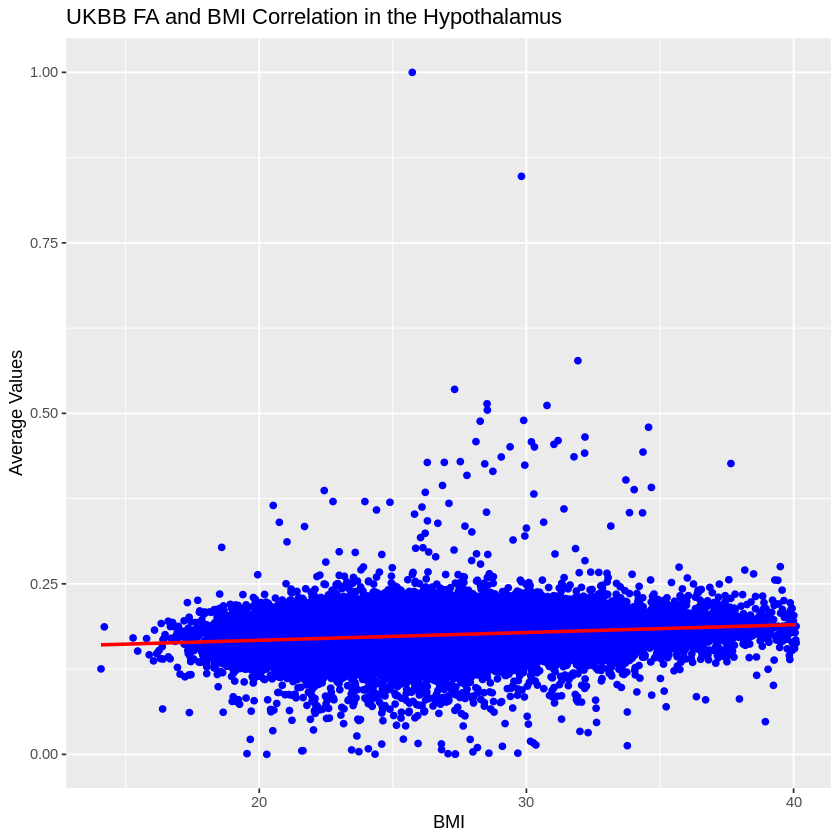

In [25]:
# Linear regression for FA and BMI in the Hypothalamus
lm <- lm(full_hypo ~ body_mass_index_bmi_21001.2.0+age_when_attended_assessment_centre_21003.2.0+sex_31.0.0, data=fa_subj_data)
fa_summary <- summary(lm)
fa_summary
point_count <- nrow(fa_subj_data)
ggplot(fa_subj_data[which(fa_subj_data$full_hypo>0),], aes(x = body_mass_index_bmi_21001.2.0, y = full_hypo)) +
  geom_point(color = "blue") +
  geom_smooth(method = "lm", formula = y ~ x, se = TRUE, color = "red") +
  geom_text(aes(x = max(body_mass_index_bmi_21001.2.0), y = max(full_hypo)),
            label = paste("N =", point_count),
            hjust = 1, vjust = 1, color = "black") +
  labs(title = "UKBB FA and BMI Correlation in the Hypothalamus", x = "BMI", y = "Average Values")


Call:
lm(formula = full_hypo ~ body_mass_index_bmi_21001.2.0 + age_when_attended_assessment_centre_21003.2.0 + 
    sex_31.0.0, data = md_subj_data)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.001566 -0.000085 -0.000014  0.000069  0.188277 

Coefficients:
                                                Estimate Std. Error t value
(Intercept)                                    8.614e-04  8.285e-05  10.396
body_mass_index_bmi_21001.2.0                 -1.660e-06  1.950e-06  -0.852
age_when_attended_assessment_centre_21003.2.0  8.460e-06  1.013e-06   8.353
sex_31.0.0Male                                 6.007e-05  1.541e-05   3.897
                                              Pr(>|t|)    
(Intercept)                                    < 2e-16 ***
body_mass_index_bmi_21001.2.0                    0.394    
age_when_attended_assessment_centre_21003.2.0  < 2e-16 ***
sex_31.0.0Male                                9.76e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*

Warning message:
“Removed 1077 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 1077 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 26027 rows containing missing values (`geom_text()`).”


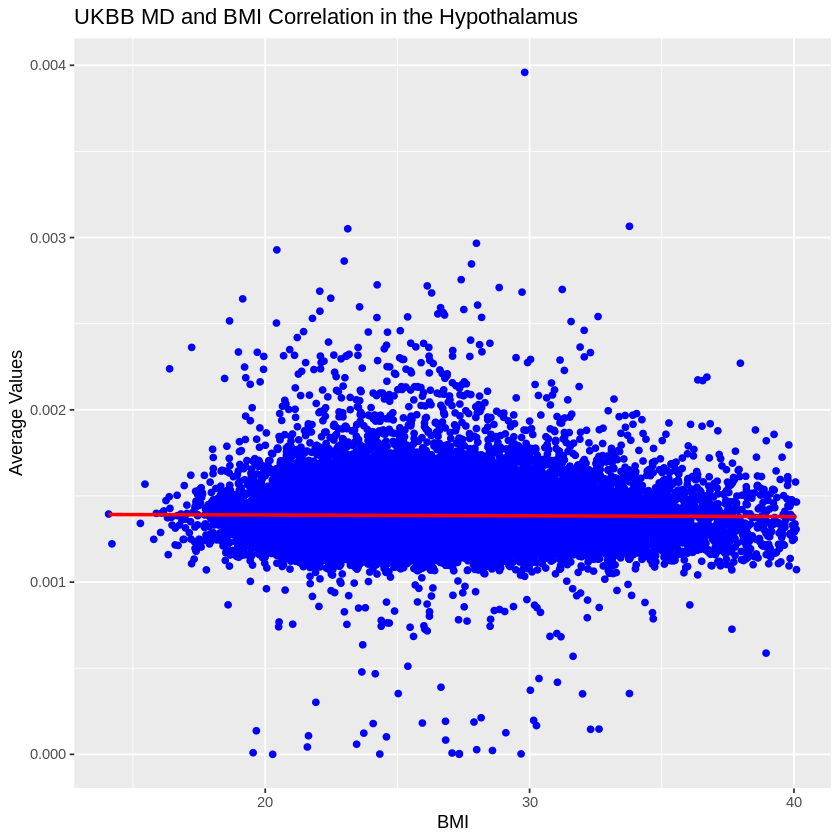

In [26]:
lm <- lm(full_hypo ~ body_mass_index_bmi_21001.2.0+age_when_attended_assessment_centre_21003.2.0+sex_31.0.0, data=md_subj_data)
md_summary <- summary(lm)
md_summary
point_count <- nrow(md_subj_data)
ggplot(md_subj_data[which(md_subj_data$full_hypo>0 & md_subj_data$full_hypo<0.15),], aes(x = body_mass_index_bmi_21001.2.0, y = full_hypo)) +
  geom_point(color = "blue") +
  geom_smooth(method = "lm", formula = y ~ x, se = TRUE, color = "red") +
  geom_text(aes(x = max(body_mass_index_bmi_21001.2.0), y = max(full_hypo)),
            label = paste("N =", point_count),
            hjust = 1, vjust = 1, color = "black") +
  labs(title = "UKBB MD and BMI Correlation in the Hypothalamus", x = "BMI", y = "Average Values")


Call:
lm(formula = full_hypo ~ body_mass_index_bmi_21001.2.0 + age_when_attended_assessment_centre_21003.2.0 + 
    sex_31.0.0, data = rd_subj_data)

Residuals:
       Min         1Q     Median         3Q        Max 
-1.418e-03 -7.687e-05 -7.050e-06  7.519e-05  1.763e-03 

Coefficients:
                                                Estimate Std. Error t value
(Intercept)                                    8.050e-04  1.330e-05  60.543
body_mass_index_bmi_21001.2.0                 -2.005e-06  3.129e-07  -6.407
age_when_attended_assessment_centre_21003.2.0  7.650e-06  1.625e-07  47.067
sex_31.0.0Male                                 4.320e-05  2.474e-06  17.464
                                              Pr(>|t|)    
(Intercept)                                    < 2e-16 ***
body_mass_index_bmi_21001.2.0                 1.51e-10 ***
age_when_attended_assessment_centre_21003.2.0  < 2e-16 ***
sex_31.0.0Male                                 < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘*

Warning message:
“Removed 1077 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 1077 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 26027 rows containing missing values (`geom_text()`).”


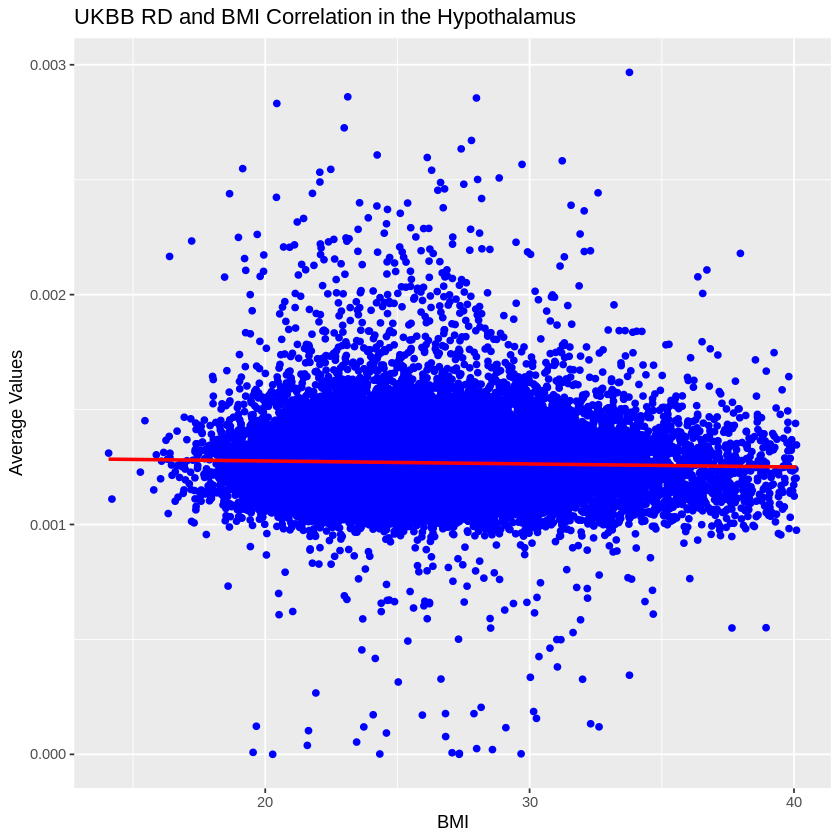

In [27]:
# Linear regression for RD and BMI in the Hypothalamus
lm <- lm(full_hypo ~ body_mass_index_bmi_21001.2.0+age_when_attended_assessment_centre_21003.2.0+sex_31.0.0, data=rd_subj_data)
rd_summary <- summary(lm)
rd_summary
point_count <- nrow(rd_subj_data)
ggplot(rd_subj_data[which(rd_subj_data$full_hypo>0),], aes(x = body_mass_index_bmi_21001.2.0, y = full_hypo)) +
  geom_point(color = "blue") +
  geom_smooth(method = "lm", formula = y ~ x, se = TRUE, color = "red") +
  geom_text(aes(x = max(body_mass_index_bmi_21001.2.0), y = max(full_hypo)),
            label = paste("N =", point_count),
            hjust = 1, vjust = 1, color = "black") +
  labs(title = "UKBB RD and BMI Correlation in the Hypothalamus", x = "BMI", y = "Average Values")


Call:
lm(formula = full_hypo ~ c.reactive_protein_30710.0.0 + age_when_attended_assessment_centre_21003.2.0 + 
    sex_31.0.0, data = fa_subj_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.18601 -0.01524  0.00134  0.01760  0.83160 

Coefficients:
                                                Estimate Std. Error t value
(Intercept)                                    1.901e-01  1.846e-03 103.003
c.reactive_protein_30710.0.0                   1.960e-03  1.913e-04  10.249
age_when_attended_assessment_centre_21003.2.0 -2.978e-04  2.904e-05 -10.252
sex_31.0.0Male                                -2.650e-03  4.368e-04  -6.066
                                              Pr(>|t|)    
(Intercept)                                    < 2e-16 ***
c.reactive_protein_30710.0.0                   < 2e-16 ***
age_when_attended_assessment_centre_21003.2.0  < 2e-16 ***
sex_31.0.0Male                                1.33e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 

Warning message:
“Removed 3232 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 3232 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 26028 rows containing missing values (`geom_text()`).”


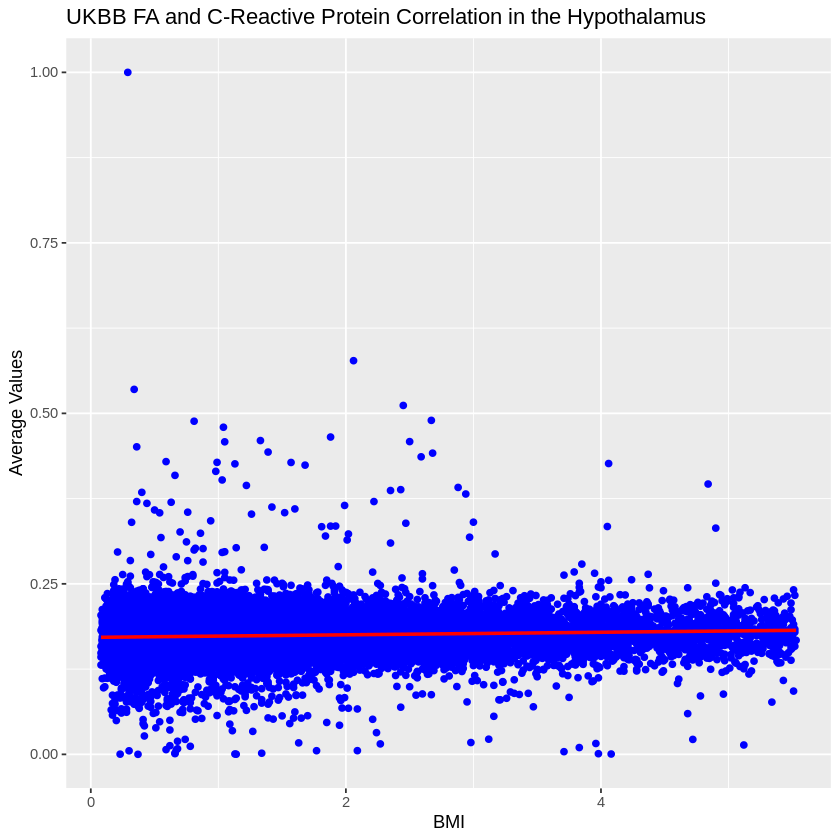

In [20]:
# Linear regression for FA and C-Reactive Protein in the Hypothalamus
lm <- lm(full_hypo ~ c.reactive_protein_30710.0.0+age_when_attended_assessment_centre_21003.2.0+sex_31.0.0, data=fa_subj_data)
fa_c_reactive <- summary(lm)
fa_c_reactive
point_count <- nrow(fa_subj_data)
fa_c_reactive_plot <- ggplot(fa_subj_data[which(fa_subj_data$full_hypo>0),], aes(x = c.reactive_protein_30710.0.0, y = full_hypo)) +
  geom_point(color = "blue") +
  geom_smooth(method = "lm", formula = y ~ x, se = TRUE, color = "red") +
  geom_text(aes(x = max(c.reactive_protein_30710.0.0), y = max(full_hypo)),
            label = paste("N =", point_count),
            hjust = 1, vjust = 1, color = "black") +
  labs(title = "UKBB FA and C-Reactive Protein Correlation in the Hypothalamus", x = "BMI", y = "Average Values")

fa_c_reactive_plot

In [28]:
# Calculate AD correlations with obesity-related parameters in the hypothalamus
lm <- lm(full_hypo ~ c.reactive_protein_30710.0.0+age_when_attended_assessment_centre_21003.2.0+sex_31.0.0, data=ad_subj_data)
ad_c_reactive <- summary(lm)
ad_c_reactive
point_count <- nrow(ad_subj_data)
ad_c_reactive_plot <- ggplot(ad_subj_data[which(ad_subj_data$full_hypo>0 & ad_subj_data$full_hypo<.2),], aes(x = c.reactive_protein_30710.0.0, y = full_hypo)) +
  geom_point(color = "blue") +
  geom_smooth(method = "lm", formula = y ~ x, se = TRUE, color = "red") +
  geom_text(aes(x = max(c.reactive_protein_30710.0.0), y = max(full_hypo)),
            label = paste("N =", point_count),
            hjust = 1, vjust = 1, color = "black") +
  labs(title = "UKBB AD and C-Reactive Protein Correlation in the Hypothalamus", x = "C-Reactive Protein", y = "Average Values")

lm <- lm(full_hypo ~ glucose_30740.0.0+age_when_attended_assessment_centre_21003.2.0+sex_31.0.0, data=ad_subj_data)
ad_glucose <- summary(lm)
ad_glucose
point_count <- nrow(ad_subj_data)
ad_glucose_plot <- ggplot(ad_subj_data[which(ad_subj_data$full_hypo>0 & ad_subj_data$full_hypo<.2),], aes(x = glucose_30740.0.0, y = full_hypo)) +
  geom_point(color = "blue") +
  geom_smooth(method = "lm", formula = y ~ x, se = TRUE, color = "red") +
  geom_text(aes(x = max(glucose_30740.0.0), y = max(full_hypo)),
            label = paste("N =", point_count),
            hjust = 1, vjust = 1, color = "black") +
  labs(title = "UKBB AD and Glucose Correlation in the Hypothalamus", x = "Glucose", y = "Average Values")

lm <- lm(full_hypo ~ glycated_haemoglobin_hba1c_30750.0.0+age_when_attended_assessment_centre_21003.2.0+sex_31.0.0, data=ad_subj_data)
ad_hba1c <- summary(lm)
ad_hba1c
point_count <- nrow(ad_subj_data)
ad_hba1c_plot <- ggplot(ad_subj_data[which(ad_subj_data$full_hypo>0 & ad_subj_data$full_hypo<.2),], aes(x = glycated_haemoglobin_hba1c_30750.0.0, y = full_hypo)) +
  geom_point(color = "blue") +
  geom_smooth(method = "lm", formula = y ~ x, se = TRUE, color = "red") +
  geom_text(aes(x = max(glycated_haemoglobin_hba1c_30750.0.0), y = max(full_hypo)),
            label = paste("N =", point_count),
            hjust = 1, vjust = 1, color = "black") +
  labs(title = "UKBB AD and HBA1C Correlation in the Hypothalamus", x = "HBA1C", y = "Average Values")

lm <- lm(full_hypo ~ cholesterol_30690.0.0+age_when_attended_assessment_centre_21003.2.0+sex_31.0.0, data=ad_subj_data)
ad_cholesterol <- summary(lm)
ad_cholesterol
point_count <- nrow(ad_subj_data)
ad_cholesterol_plot <- ggplot(ad_subj_data[which(ad_subj_data$full_hypo>0 & ad_subj_data$full_hypo<.2),], aes(x = cholesterol_30690.0.0, y = full_hypo)) +
  geom_point(color = "blue") +
  geom_smooth(method = "lm", formula = y ~ x, se = TRUE, color = "red") +
  geom_text(aes(x = max(cholesterol_30690.0.0), y = max(full_hypo)),
            label = paste("N =", point_count),
            hjust = 1, vjust = 1, color = "black") +
  labs(title = "UKBB AD and Cholesterol Correlation in the Hypothalamus", x = "Cholesterol", y = "Average Values")

lm <- lm(full_hypo ~ hdl_cholesterol_30760.0.0+age_when_attended_assessment_centre_21003.2.0+sex_31.0.0, data=ad_subj_data)
ad_hdl_chol <- summary(lm)
ad_hdl_chol
point_count <- nrow(ad_subj_data)
ad_hdl_chol_plot <- ggplot(ad_subj_data[which(ad_subj_data$full_hypo>0 & ad_subj_data$full_hypo<.2),], aes(x = hdl_cholesterol_30760.0.0, y = full_hypo)) +
  geom_point(color = "blue") +
  geom_smooth(method = "lm", formula = y ~ x, se = TRUE, color = "red") +
  geom_text(aes(x = max(hdl_cholesterol_30760.0.0), y = max(full_hypo)),
            label = paste("N =", point_count),
            hjust = 1, vjust = 1, color = "black") +
  labs(title = "UKBB AD and HDL Cholesterol Correlation in the Hypothalamus", x = "HDL Cholesterol", y = "Average Values")

lm <- lm(full_hypo ~ ldl_direct_30780.0.0+age_when_attended_assessment_centre_21003.2.0+sex_31.0.0, data=ad_subj_data)
ad_ldl_chol <- summary(lm)
ad_ldl_chol
point_count <- nrow(ad_subj_data)
ad_ldl_chol_plot <- ggplot(ad_subj_data[which(ad_subj_data$full_hypo>0 & ad_subj_data$full_hypo<.2),], aes(x = ldl_direct_30780.0.0, y = full_hypo)) +
  geom_point(color = "blue") +
  geom_smooth(method = "lm", formula = y ~ x, se = TRUE, color = "red") +
  geom_text(aes(x = max(ldl_direct_30780.0.0), y = max(full_hypo)),
            label = paste("N =", point_count),
            hjust = 1, vjust = 1, color = "black") +
  labs(title = "UKBB AD and LDL Cholesterol Correlation in the Hypothalamus", x = "LDL Cholesterol", y = "Average Values")

lm <- lm(full_hypo ~ triglycerides_30870.0.0+age_when_attended_assessment_centre_21003.2.0+sex_31.0.0, data=ad_subj_data)
ad_triglycerides <- summary(lm)
ad_triglycerides
point_count <- nrow(ad_subj_data)
ad_triglycerides_plot <- ggplot(ad_subj_data[which(ad_subj_data$full_hypo>0 & ad_subj_data$full_hypo<.2),], aes(x = triglycerides_30870.0.0, y = full_hypo)) +
  geom_point(color = "blue") +
  geom_smooth(method = "lm", formula = y ~ x, se = TRUE, color = "red") +
  geom_text(aes(x = max(triglycerides_30870.0.0), y = max(full_hypo)),
            label = paste("N =", point_count),
            hjust = 1, vjust = 1, color = "black") +
  labs(title = "UKBB AD and Triglycerides Correlation in the Hypothalamus", x = "Triglycerides", y = "Average Values")

lm <- lm(full_hypo ~ systolic_blood_pressure_automated_reading_4080.0.1+age_when_attended_assessment_centre_21003.2.0+sex_31.0.0, data=ad_subj_data)
ad_sys_bp <- summary(lm)
ad_sys_bp
point_count <- nrow(ad_subj_data)
ad_sys_bp_plot <- ggplot(ad_subj_data[which(ad_subj_data$full_hypo>0 & ad_subj_data$full_hypo<.2),], aes(x = systolic_blood_pressure_automated_reading_4080.0.1, y = full_hypo)) +
  geom_point(color = "blue") +
  geom_smooth(method = "lm", formula = y ~ x, se = TRUE, color = "red") +
  geom_text(aes(x = max(systolic_blood_pressure_automated_reading_4080.0.1), y = max(full_hypo)),
            label = paste("N =", point_count),
            hjust = 1, vjust = 1, color = "black") +
  labs(title = "UKBB AD and Systolic Blood Pressure Correlation in the Hypothalamus", x = "Systolic Blood Pressure", y = "Average Values")

lm <- lm(full_hypo ~ diastolic_blood_pressure_automated_reading_4079.0.1+age_when_attended_assessment_centre_21003.2.0+sex_31.0.0, data=ad_subj_data)
ad_dia_bp <- summary(lm)
ad_dia_bp
point_count <- nrow(ad_subj_data)
ad_dia_bp_plot <- ggplot(ad_subj_data[which(ad_subj_data$full_hypo>0 & ad_subj_data$full_hypo<.2),], aes(x = diastolic_blood_pressure_automated_reading_4079.0.1, y = full_hypo)) +
  geom_point(color = "blue") +
  geom_smooth(method = "lm", formula = y ~ x, se = TRUE, color = "red") +
  geom_text(aes(x = max(diastolic_blood_pressure_automated_reading_4079.0.1), y = max(full_hypo)),
            label = paste("N =", point_count),
            hjust = 1, vjust = 1, color = "black") +
  labs(title = "UKBB AD and Diastolic Blod Pressure Correlation in the Hypothalamus", x = "Diastolic Blod Pressure", y = "Average Values")


Call:
lm(formula = full_hypo ~ c.reactive_protein_30710.0.0 + age_when_attended_assessment_centre_21003.2.0 + 
    sex_31.0.0, data = ad_subj_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.00183 -0.00011 -0.00003  0.00007  0.56741 

Coefficients:
                                                Estimate Std. Error t value
(Intercept)                                    9.527e-04  2.102e-04   4.532
c.reactive_protein_30710.0.0                  -1.861e-05  2.178e-05  -0.855
age_when_attended_assessment_centre_21003.2.0  1.041e-05  3.308e-06   3.148
sex_31.0.0Male                                 9.639e-05  4.974e-05   1.938
                                              Pr(>|t|)    
(Intercept)                                   5.87e-06 ***
c.reactive_protein_30710.0.0                   0.39277    
age_when_attended_assessment_centre_21003.2.0  0.00164 ** 
sex_31.0.0Male                                 0.05267 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 


Call:
lm(formula = full_hypo ~ glucose_30740.0.0 + age_when_attended_assessment_centre_21003.2.0 + 
    sex_31.0.0, data = ad_subj_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.00185 -0.00011 -0.00003  0.00006  0.56742 

Coefficients:
                                               Estimate Std. Error t value
(Intercept)                                   8.333e-04  3.093e-04   2.694
glucose_30740.0.0                             2.380e-05  4.907e-05   0.485
age_when_attended_assessment_centre_21003.2.0 1.007e-05  3.517e-06   2.862
sex_31.0.0Male                                9.967e-05  5.259e-05   1.895
                                              Pr(>|t|)   
(Intercept)                                    0.00706 **
glucose_30740.0.0                              0.62765   
age_when_attended_assessment_centre_21003.2.0  0.00421 **
sex_31.0.0Male                                 0.05808 . 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual s


Call:
lm(formula = full_hypo ~ glycated_haemoglobin_hba1c_30750.0.0 + 
    age_when_attended_assessment_centre_21003.2.0 + sex_31.0.0, 
    data = ad_subj_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.00183 -0.00011 -0.00003  0.00006  0.56743 

Coefficients:
                                                Estimate Std. Error t value
(Intercept)                                    9.908e-04  2.709e-04   3.658
glycated_haemoglobin_hba1c_30750.0.0          -1.889e-06  6.927e-06  -0.273
age_when_attended_assessment_centre_21003.2.0  1.045e-05  3.289e-06   3.179
sex_31.0.0Male                                 9.440e-05  4.772e-05   1.978
                                              Pr(>|t|)    
(Intercept)                                   0.000255 ***
glycated_haemoglobin_hba1c_30750.0.0          0.785070    
age_when_attended_assessment_centre_21003.2.0 0.001481 ** 
sex_31.0.0Male                                0.047931 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 


Call:
lm(formula = full_hypo ~ cholesterol_30690.0.0 + age_when_attended_assessment_centre_21003.2.0 + 
    sex_31.0.0, data = ad_subj_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.00197 -0.00012 -0.00002  0.00008  0.56727 

Coefficients:
                                               Estimate Std. Error t value
(Intercept)                                   6.733e-04  2.220e-04   3.032
cholesterol_30690.0.0                         5.840e-05  2.223e-05   2.627
age_when_attended_assessment_centre_21003.2.0 9.058e-06  3.118e-06   2.905
sex_31.0.0Male                                1.075e-04  4.693e-05   2.291
                                              Pr(>|t|)   
(Intercept)                                    0.00243 **
cholesterol_30690.0.0                          0.00861 **
age_when_attended_assessment_centre_21003.2.0  0.00368 **
sex_31.0.0Male                                 0.02195 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residu


Call:
lm(formula = full_hypo ~ hdl_cholesterol_30760.0.0 + age_when_attended_assessment_centre_21003.2.0 + 
    sex_31.0.0, data = ad_subj_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.00185 -0.00011 -0.00003  0.00006  0.56742 

Coefficients:
                                               Estimate Std. Error t value
(Intercept)                                   9.009e-04  2.407e-04   3.743
hdl_cholesterol_30760.0.0                     2.846e-05  7.758e-05   0.367
age_when_attended_assessment_centre_21003.2.0 1.010e-05  3.411e-06   2.962
sex_31.0.0Male                                1.076e-04  5.709e-05   1.885
                                              Pr(>|t|)    
(Intercept)                                   0.000182 ***
hdl_cholesterol_30760.0.0                     0.713702    
age_when_attended_assessment_centre_21003.2.0 0.003063 ** 
sex_31.0.0Male                                0.059466 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 


Call:
lm(formula = full_hypo ~ ldl_direct_30780.0.0 + age_when_attended_assessment_centre_21003.2.0 + 
    sex_31.0.0, data = ad_subj_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.00192 -0.00012 -0.00003  0.00007  0.56731 

Coefficients:
                                               Estimate Std. Error t value
(Intercept)                                   7.584e-04  2.130e-04   3.561
ldl_direct_30780.0.0                          6.600e-05  2.878e-05   2.294
age_when_attended_assessment_centre_21003.2.0 9.364e-06  3.114e-06   3.007
sex_31.0.0Male                                9.415e-05  4.669e-05   2.016
                                              Pr(>|t|)    
(Intercept)                                    0.00037 ***
ldl_direct_30780.0.0                           0.02182 *  
age_when_attended_assessment_centre_21003.2.0  0.00264 ** 
sex_31.0.0Male                                 0.04378 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Re


Call:
lm(formula = full_hypo ~ triglycerides_30870.0.0 + age_when_attended_assessment_centre_21003.2.0 + 
    sex_31.0.0, data = ad_subj_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.00191 -0.00011 -0.00003  0.00007  0.56738 

Coefficients:
                                               Estimate Std. Error t value
(Intercept)                                   9.002e-04  2.026e-04   4.444
triglycerides_30870.0.0                       4.894e-05  3.247e-05   1.507
age_when_attended_assessment_centre_21003.2.0 9.809e-06  3.166e-06   3.099
sex_31.0.0Male                                7.521e-05  4.931e-05   1.525
                                              Pr(>|t|)    
(Intercept)                                   8.89e-06 ***
triglycerides_30870.0.0                        0.13177    
age_when_attended_assessment_centre_21003.2.0  0.00195 ** 
sex_31.0.0Male                                 0.12725    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



Call:
lm(formula = full_hypo ~ systolic_blood_pressure_automated_reading_4080.0.1 + 
    age_when_attended_assessment_centre_21003.2.0 + sex_31.0.0, 
    data = ad_subj_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.00183 -0.00011 -0.00003  0.00006  0.56743 

Coefficients:
                                                     Estimate Std. Error
(Intercept)                                         9.634e-04  2.396e-04
systolic_blood_pressure_automated_reading_4080.0.1 -1.910e-07  1.461e-06
age_when_attended_assessment_centre_21003.2.0       1.024e-05  3.280e-06
sex_31.0.0Male                                      9.680e-05  4.869e-05
                                                   t value Pr(>|t|)    
(Intercept)                                          4.020 5.83e-05 ***
systolic_blood_pressure_automated_reading_4080.0.1  -0.131   0.8960    
age_when_attended_assessment_centre_21003.2.0        3.122   0.0018 ** 
sex_31.0.0Male                                      


Call:
lm(formula = full_hypo ~ diastolic_blood_pressure_automated_reading_4079.0.1 + 
    age_when_attended_assessment_centre_21003.2.0 + sex_31.0.0, 
    data = ad_subj_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.00183 -0.00011 -0.00003  0.00006  0.56743 

Coefficients:
                                                     Estimate Std. Error
(Intercept)                                         8.839e-04  2.704e-04
diastolic_blood_pressure_automated_reading_4079.0.1 8.503e-07  2.444e-06
age_when_attended_assessment_centre_21003.2.0       1.004e-05  3.152e-06
sex_31.0.0Male                                      9.177e-05  4.866e-05
                                                    t value Pr(>|t|)   
(Intercept)                                           3.269  0.00108 **
diastolic_blood_pressure_automated_reading_4079.0.1   0.348  0.72793   
age_when_attended_assessment_centre_21003.2.0         3.185  0.00145 **
sex_31.0.0Male                                     

Warning message:
“Removed 3231 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 3231 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 26025 rows containing missing values (`geom_text()`).”
Warning message:
“Removed 4478 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 4478 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 26025 rows containing missing values (`geom_text()`).”


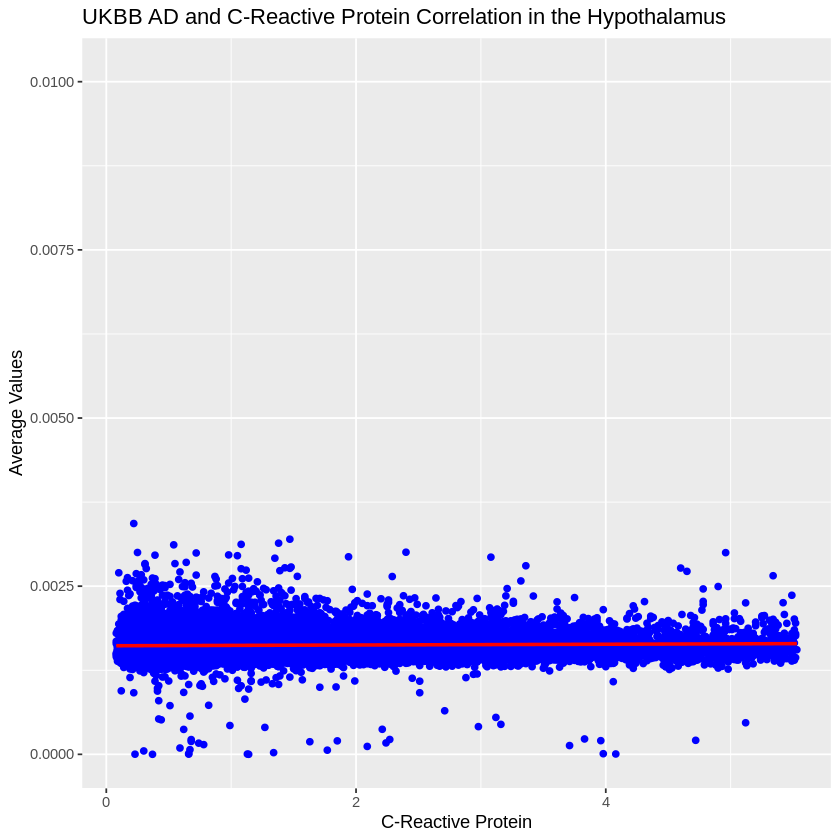

Warning message:
“Removed 2262 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 2262 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 26025 rows containing missing values (`geom_text()`).”


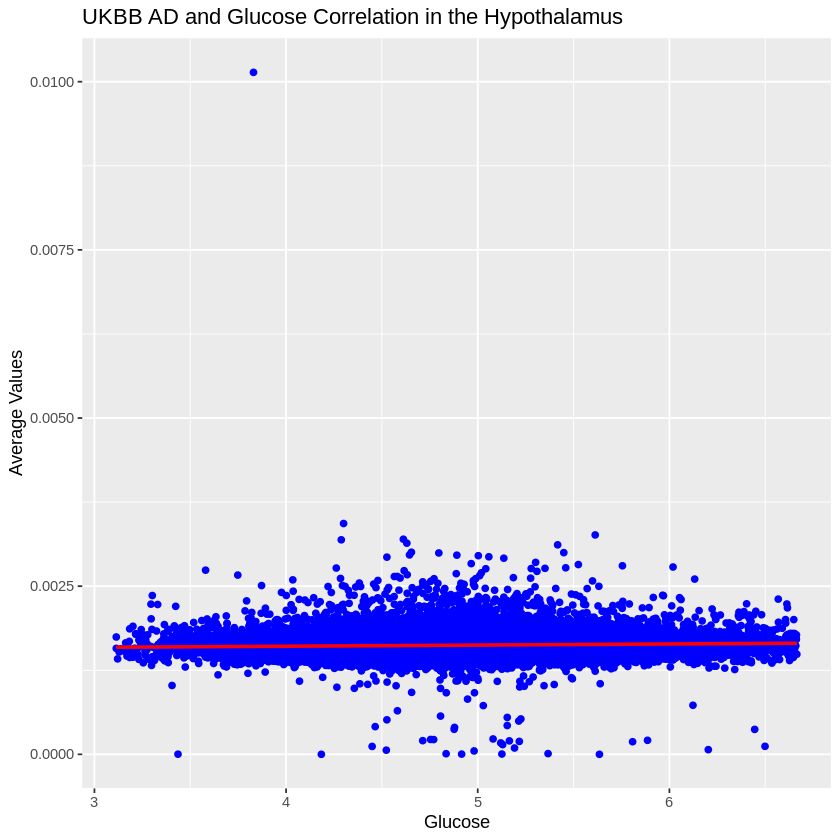

Warning message:
“Removed 1698 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 1698 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 26025 rows containing missing values (`geom_text()`).”


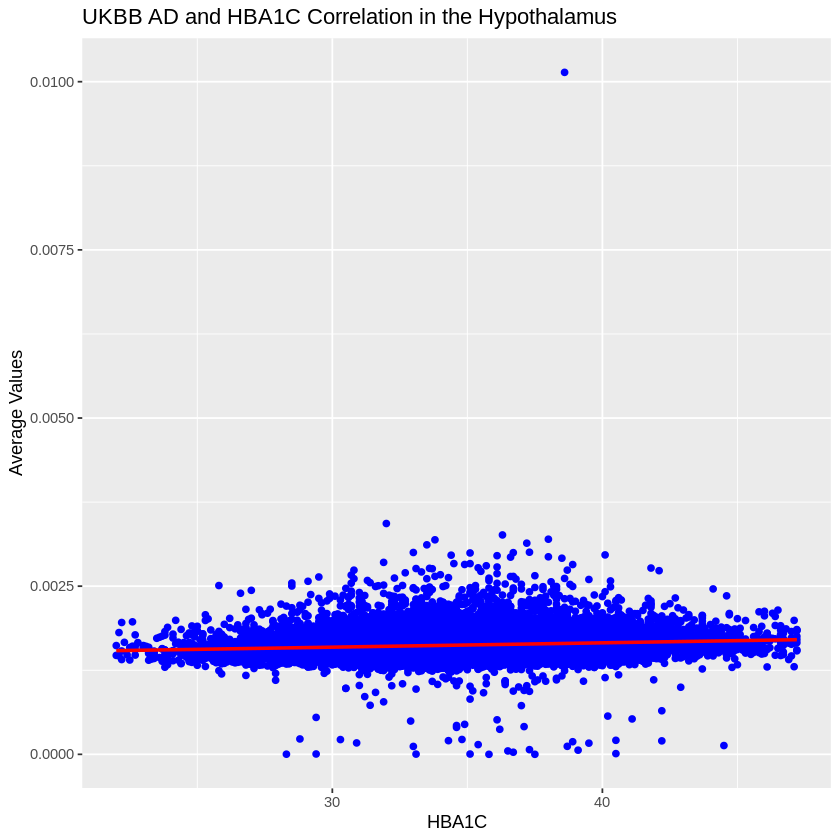

Warning message:
“Removed 1740 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 1740 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 26025 rows containing missing values (`geom_text()`).”


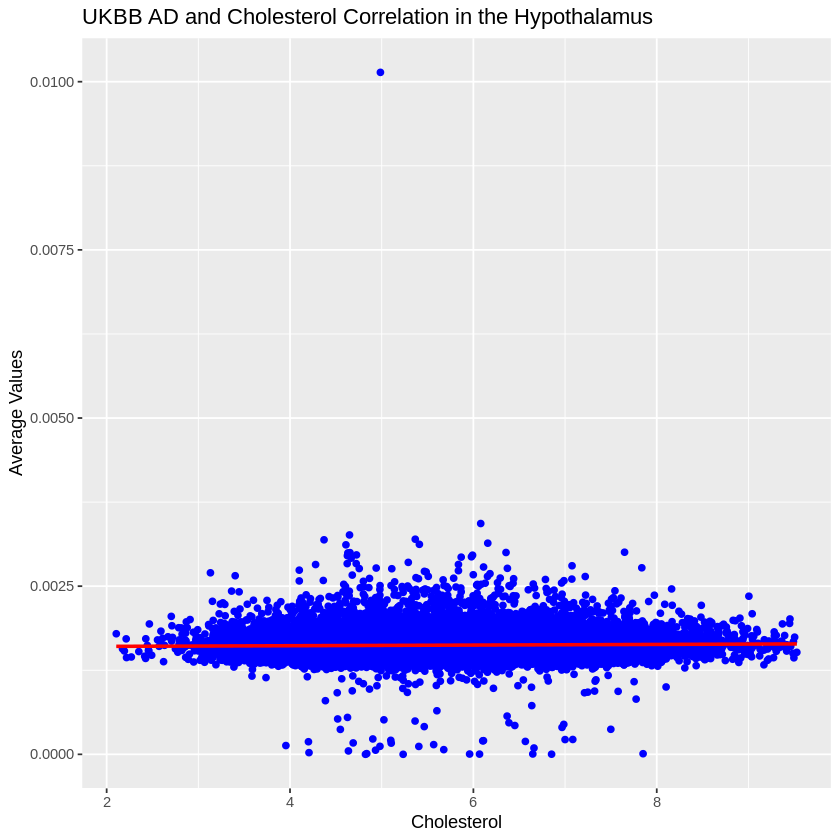

Warning message:
“Removed 3879 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 3879 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 26025 rows containing missing values (`geom_text()`).”


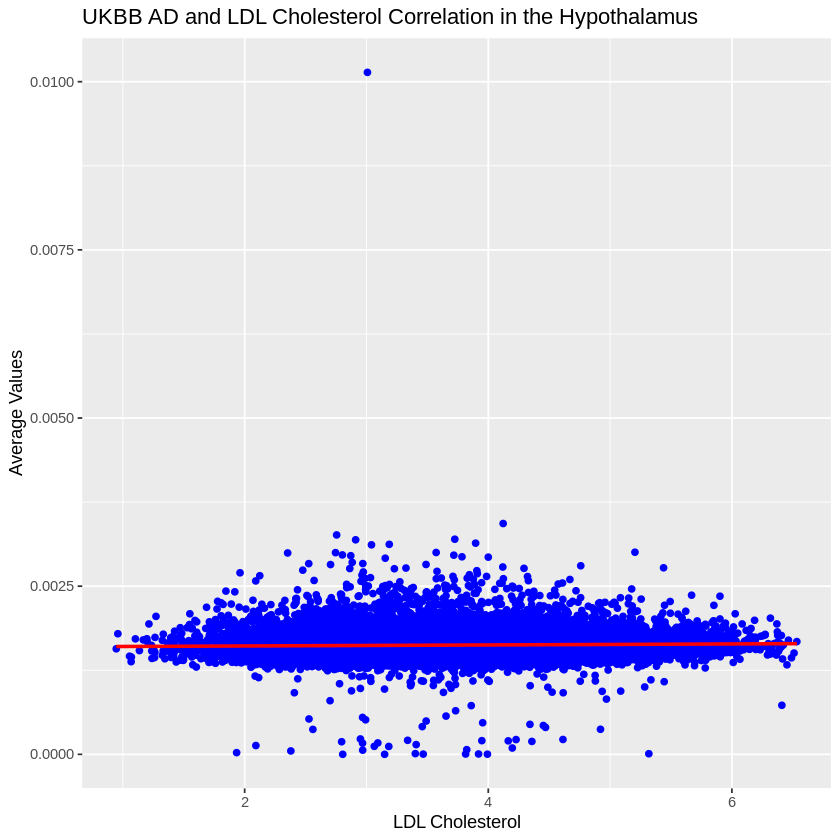

Warning message:
“Removed 2201 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 2201 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 26025 rows containing missing values (`geom_text()`).”


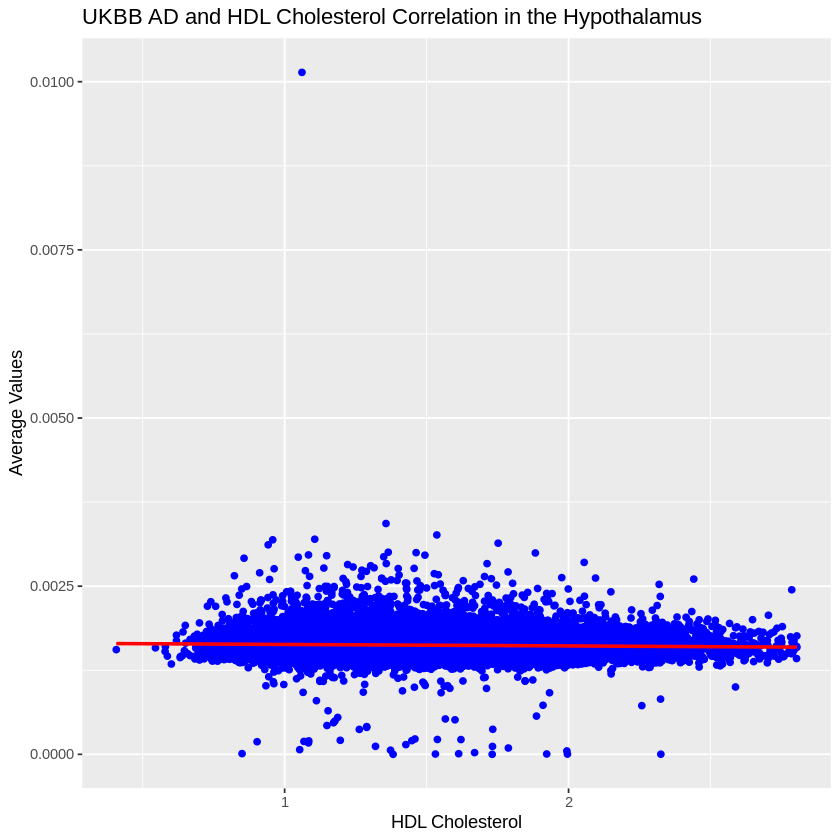

Warning message:
“Removed 2224 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 2224 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 26025 rows containing missing values (`geom_text()`).”


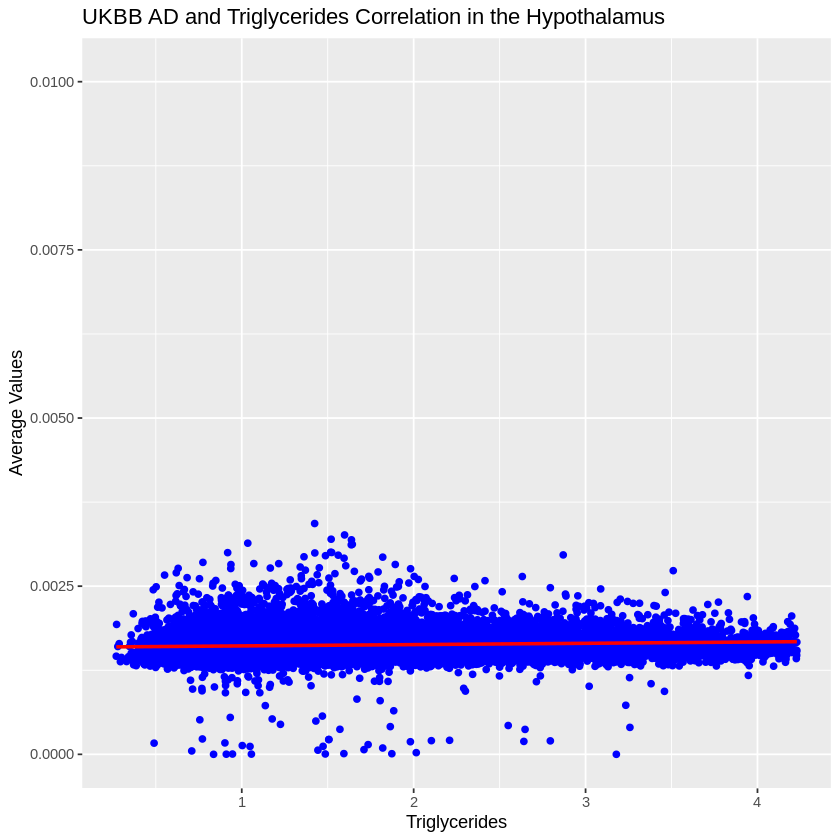

Warning message:
“Removed 2182 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 2182 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 26025 rows containing missing values (`geom_text()`).”


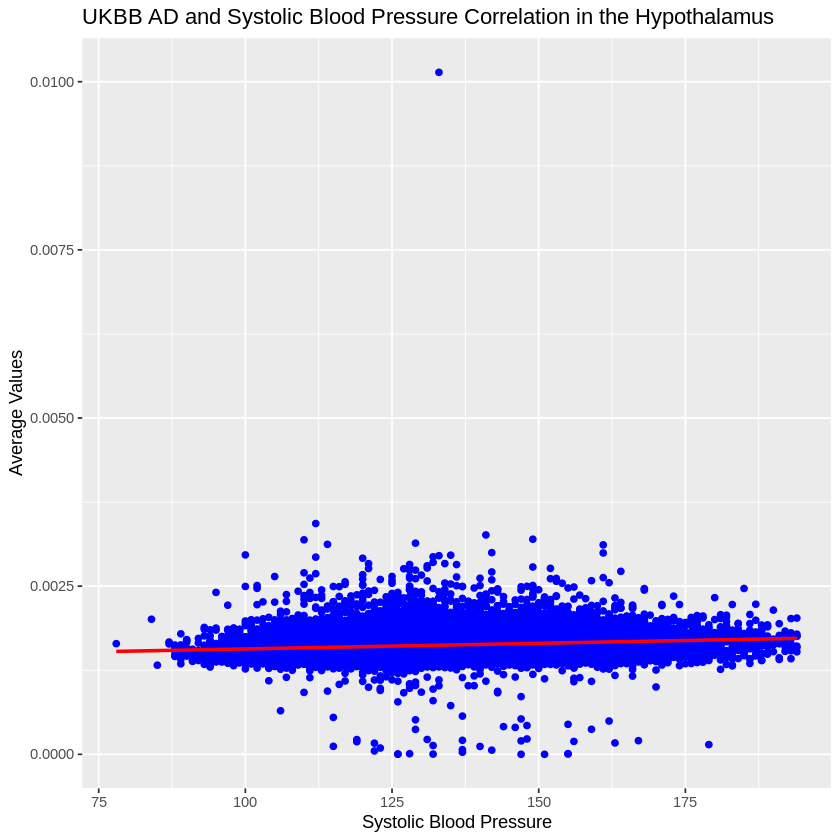

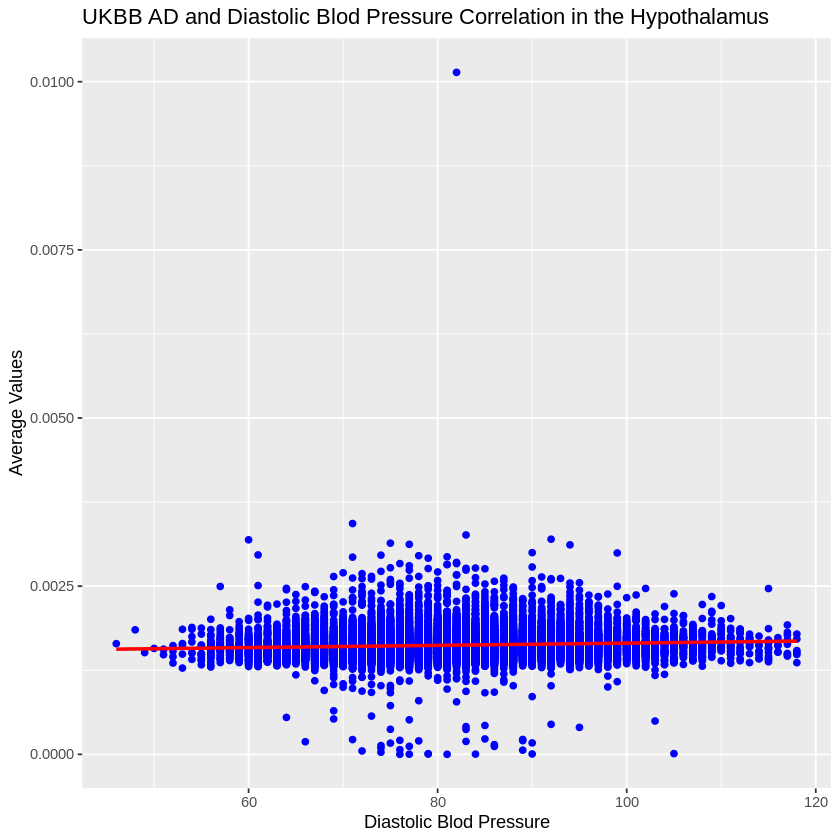

In [17]:
# Display AD plots
ad_c_reactive_plot
ad_glucose_plot
ad_hba1c_plot
ad_cholesterol_plot
ad_ldl_chol_plot
ad_hdl_chol_plot
ad_triglycerides_plot
ad_sys_bp_plot
ad_dia_bp_plot

In [29]:
# Calculate FA correlations with obesity-related parameters in the hypothalamus
lm <- lm(full_hypo ~ c.reactive_protein_30710.0.0+age_when_attended_assessment_centre_21003.2.0+sex_31.0.0, data=fa_subj_data)
fa_c_reactive <- summary(lm)
fa_c_reactive
point_count <- nrow(fa_subj_data)
fa_c_reactive_plot <- ggplot(fa_subj_data[which(fa_subj_data$full_hypo>0),], aes(x = c.reactive_protein_30710.0.0, y = full_hypo)) +
  geom_point(color = "blue") +
  geom_smooth(method = "lm", formula = y ~ x, se = TRUE, color = "red") +
  geom_text(aes(x = max(c.reactive_protein_30710.0.0), y = max(full_hypo)),
            label = paste("N =", point_count),
            hjust = 1, vjust = 1, color = "black") +
  labs(title = "UKBB FA and C-Reactive Protein Correlation in the Hypothalamus", x = "C-Reactive Protein", y = "Average Values")

lm <- lm(full_hypo ~ glucose_30740.0.0+age_when_attended_assessment_centre_21003.2.0+sex_31.0.0, data=fa_subj_data)
fa_glucose <- summary(lm)
fa_glucose
point_count <- nrow(fa_subj_data)
fa_glucose_plot <- ggplot(fa_subj_data[which(fa_subj_data$full_hypo>0),], aes(x = glucose_30740.0.0, y = full_hypo)) +
  geom_point(color = "blue") +
  geom_smooth(method = "lm", formula = y ~ x, se = TRUE, color = "red") +
  geom_text(aes(x = max(glucose_30740.0.0), y = max(full_hypo)),
            label = paste("N =", point_count),
            hjust = 1, vjust = 1, color = "black") +
  labs(title = "UKBB FA and Glucose Correlation in the Hypothalamus", x = "Glucose", y = "Average Values")

lm <- lm(full_hypo ~ glycated_haemoglobin_hba1c_30750.0.0+age_when_attended_assessment_centre_21003.2.0+sex_31.0.0, data=fa_subj_data)
fa_hba1c <- summary(lm)
fa_hba1c
point_count <- nrow(fa_subj_data)
fa_hba1c_plot <- ggplot(fa_subj_data[which(fa_subj_data$full_hypo>0),], aes(x = glycated_haemoglobin_hba1c_30750.0.0, y = full_hypo)) +
  geom_point(color = "blue") +
  geom_smooth(method = "lm", formula = y ~ x, se = TRUE, color = "red") +
  geom_text(aes(x = max(glycated_haemoglobin_hba1c_30750.0.0), y = max(full_hypo)),
            label = paste("N =", point_count),
            hjust = 1, vjust = 1, color = "black") +
  labs(title = "UKBB FA and HBA1C Correlation in the Hypothalamus", x = "HBA1C", y = "Average Values")

lm <- lm(full_hypo ~ cholesterol_30690.0.0+age_when_attended_assessment_centre_21003.2.0+sex_31.0.0, data=fa_subj_data)
fa_cholesterol <- summary(lm)
fa_cholesterol
point_count <- nrow(fa_subj_data)
fa_cholesterol_plot <- ggplot(fa_subj_data[which(fa_subj_data$full_hypo>0),], aes(x = cholesterol_30690.0.0, y = full_hypo)) +
  geom_point(color = "blue") +
  geom_smooth(method = "lm", formula = y ~ x, se = TRUE, color = "red") +
  geom_text(aes(x = max(cholesterol_30690.0.0), y = max(full_hypo)),
            label = paste("N =", point_count),
            hjust = 1, vjust = 1, color = "black") +
  labs(title = "UKBB FA and Cholesterol Correlation in the Hypothalamus", x = "Cholesterol", y = "Average Values")

lm <- lm(full_hypo ~ hdl_cholesterol_30760.0.0+age_when_attended_assessment_centre_21003.2.0+sex_31.0.0, data=fa_subj_data)
fa_hdl_chol <- summary(lm)
fa_hdl_chol
point_count <- nrow(fa_subj_data)
fa_hdl_chol_plot <- ggplot(fa_subj_data[which(fa_subj_data$full_hypo>0),], aes(x = hdl_cholesterol_30760.0.0, y = full_hypo)) +
  geom_point(color = "blue") +
  geom_smooth(method = "lm", formula = y ~ x, se = TRUE, color = "red") +
  geom_text(aes(x = max(hdl_cholesterol_30760.0.0), y = max(full_hypo)),
            label = paste("N =", point_count),
            hjust = 1, vjust = 1, color = "black") +
  labs(title = "UKBB FA and HDL Cholesterol Correlation in the Hypothalamus", x = "HDL Cholesterol", y = "Average Values")

lm <- lm(full_hypo ~ ldl_direct_30780.0.0+age_when_attended_assessment_centre_21003.2.0+sex_31.0.0, data=fa_subj_data)
fa_ldl_chol <- summary(lm)
fa_ldl_chol
point_count <- nrow(fa_subj_data)
fa_ldl_chol_plot <- ggplot(fa_subj_data[which(fa_subj_data$full_hypo>0),], aes(x = ldl_direct_30780.0.0, y = full_hypo)) +
  geom_point(color = "blue") +
  geom_smooth(method = "lm", formula = y ~ x, se = TRUE, color = "red") +
  geom_text(aes(x = max(ldl_direct_30780.0.0), y = max(full_hypo)),
            label = paste("N =", point_count),
            hjust = 1, vjust = 1, color = "black") +
  labs(title = "UKBB FA and LDL Cholesterol Correlation in the Hypothalamus", x = "LDL Cholesterol", y = "Average Values")

lm <- lm(full_hypo ~ triglycerides_30870.0.0+age_when_attended_assessment_centre_21003.2.0+sex_31.0.0, data=fa_subj_data)
fa_triglycerides <- summary(lm)
fa_triglycerides
point_count <- nrow(fa_subj_data)
fa_triglycerides_plot <- ggplot(fa_subj_data[which(fa_subj_data$full_hypo>0),], aes(x = triglycerides_30870.0.0, y = full_hypo)) +
  geom_point(color = "blue") +
  geom_smooth(method = "lm", formula = y ~ x, se = TRUE, color = "red") +
  geom_text(aes(x = max(triglycerides_30870.0.0), y = max(full_hypo)),
            label = paste("N =", point_count),
            hjust = 1, vjust = 1, color = "black") +
  labs(title = "UKBB FA and Triglycerides Correlation in the Hypothalamus", x = "Triglycerides", y = "Average Values")

lm <- lm(full_hypo ~ systolic_blood_pressure_automated_reading_4080.0.1+age_when_attended_assessment_centre_21003.2.0+sex_31.0.0, data=fa_subj_data)
fa_sys_bp <- summary(lm)
fa_sys_bp
point_count <- nrow(fa_subj_data)
fa_sys_bp_plot <- ggplot(fa_subj_data[which(fa_subj_data$full_hypo>0),], aes(x = systolic_blood_pressure_automated_reading_4080.0.1, y = full_hypo)) +
  geom_point(color = "blue") +
  geom_smooth(method = "lm", formula = y ~ x, se = TRUE, color = "red") +
  geom_text(aes(x = max(systolic_blood_pressure_automated_reading_4080.0.1), y = max(full_hypo)),
            label = paste("N =", point_count),
            hjust = 1, vjust = 1, color = "black") +
  labs(title = "UKBB FA and Systolic Blood Pressure Correlation in the Hypothalamus", x = "Systolic Blood Pressure", y = "Average Values")

lm <- lm(full_hypo ~ diastolic_blood_pressure_automated_reading_4079.0.1+age_when_attended_assessment_centre_21003.2.0+sex_31.0.0, data=fa_subj_data)
fa_dia_bp <- summary(lm)
fa_dia_bp
point_count <- nrow(fa_subj_data)
fa_dia_bp_plot <- ggplot(fa_subj_data[which(fa_subj_data$full_hypo>0),], aes(x = diastolic_blood_pressure_automated_reading_4079.0.1, y = full_hypo)) +
  geom_point(color = "blue") +
  geom_smooth(method = "lm", formula = y ~ x, se = TRUE, color = "red") +
  geom_text(aes(x = max(diastolic_blood_pressure_automated_reading_4079.0.1), y = max(full_hypo)),
            label = paste("N =", point_count),
            hjust = 1, vjust = 1, color = "black") +
  labs(title = "UKBB FA and Diastolic Blod Pressure Correlation in the Hypothalamus", x = "Diastolic Blod Pressure", y = "Average Values")


Call:
lm(formula = full_hypo ~ c.reactive_protein_30710.0.0 + age_when_attended_assessment_centre_21003.2.0 + 
    sex_31.0.0, data = fa_subj_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.18601 -0.01524  0.00134  0.01760  0.83160 

Coefficients:
                                                Estimate Std. Error t value
(Intercept)                                    1.901e-01  1.846e-03 103.003
c.reactive_protein_30710.0.0                   1.960e-03  1.913e-04  10.249
age_when_attended_assessment_centre_21003.2.0 -2.978e-04  2.904e-05 -10.252
sex_31.0.0Male                                -2.650e-03  4.368e-04  -6.066
                                              Pr(>|t|)    
(Intercept)                                    < 2e-16 ***
c.reactive_protein_30710.0.0                   < 2e-16 ***
age_when_attended_assessment_centre_21003.2.0  < 2e-16 ***
sex_31.0.0Male                                1.33e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 


Call:
lm(formula = full_hypo ~ glucose_30740.0.0 + age_when_attended_assessment_centre_21003.2.0 + 
    sex_31.0.0, data = fa_subj_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.17833 -0.01542  0.00125  0.01756  0.82944 

Coefficients:
                                                Estimate Std. Error t value
(Intercept)                                    1.905e-01  2.683e-03  70.990
glucose_30740.0.0                              6.532e-04  4.257e-04   1.534
age_when_attended_assessment_centre_21003.2.0 -3.048e-04  3.051e-05  -9.989
sex_31.0.0Male                                -3.168e-03  4.562e-04  -6.944
                                              Pr(>|t|)    
(Intercept)                                    < 2e-16 ***
glucose_30740.0.0                                0.125    
age_when_attended_assessment_centre_21003.2.0  < 2e-16 ***
sex_31.0.0Male                                3.91e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1




Call:
lm(formula = full_hypo ~ glycated_haemoglobin_hba1c_30750.0.0 + 
    age_when_attended_assessment_centre_21003.2.0 + sex_31.0.0, 
    data = fa_subj_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.17897 -0.01536  0.00130  0.01744  0.82968 

Coefficients:
                                                Estimate Std. Error t value
(Intercept)                                    1.906e-01  2.463e-03  77.375
glycated_haemoglobin_hba1c_30750.0.0           8.651e-05  6.298e-05   1.374
age_when_attended_assessment_centre_21003.2.0 -3.057e-04  2.990e-05 -10.224
sex_31.0.0Male                                -2.975e-03  4.339e-04  -6.857
                                              Pr(>|t|)    
(Intercept)                                    < 2e-16 ***
glycated_haemoglobin_hba1c_30750.0.0              0.17    
age_when_attended_assessment_centre_21003.2.0  < 2e-16 ***
sex_31.0.0Male                                7.19e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 


Call:
lm(formula = full_hypo ~ cholesterol_30690.0.0 + age_when_attended_assessment_centre_21003.2.0 + 
    sex_31.0.0, data = fa_subj_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.17860 -0.01536  0.00128  0.01755  0.82824 

Coefficients:
                                                Estimate Std. Error t value
(Intercept)                                    1.905e-01  2.047e-03  93.054
cholesterol_30690.0.0                          4.330e-04  2.050e-04   2.112
age_when_attended_assessment_centre_21003.2.0 -2.956e-04  2.876e-05 -10.278
sex_31.0.0Male                                -2.879e-03  4.327e-04  -6.653
                                              Pr(>|t|)    
(Intercept)                                    < 2e-16 ***
cholesterol_30690.0.0                           0.0347 *  
age_when_attended_assessment_centre_21003.2.0  < 2e-16 ***
sex_31.0.0Male                                2.94e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’


Call:
lm(formula = full_hypo ~ hdl_cholesterol_30760.0.0 + age_when_attended_assessment_centre_21003.2.0 + 
    sex_31.0.0, data = fa_subj_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.18109 -0.01532  0.00129  0.01746  0.83032 

Coefficients:
                                                Estimate Std. Error t value
(Intercept)                                    0.2027171  0.0021163  95.789
hdl_cholesterol_30760.0.0                     -0.0068979  0.0006822 -10.112
age_when_attended_assessment_centre_21003.2.0 -0.0002683  0.0000300  -8.944
sex_31.0.0Male                                -0.0054211  0.0005020 -10.798
                                              Pr(>|t|)    
(Intercept)                                     <2e-16 ***
hdl_cholesterol_30760.0.0                       <2e-16 ***
age_when_attended_assessment_centre_21003.2.0   <2e-16 ***
sex_31.0.0Male                                  <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1


Call:
lm(formula = full_hypo ~ ldl_direct_30780.0.0 + age_when_attended_assessment_centre_21003.2.0 + 
    sex_31.0.0, data = fa_subj_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.17854 -0.01535  0.00129  0.01757  0.82745 

Coefficients:
                                                Estimate Std. Error t value
(Intercept)                                    1.896e-01  1.962e-03  96.616
ldl_direct_30780.0.0                           1.037e-03  2.651e-04   3.913
age_when_attended_assessment_centre_21003.2.0 -2.998e-04  2.869e-05 -10.449
sex_31.0.0Male                                -2.946e-03  4.302e-04  -6.847
                                              Pr(>|t|)    
(Intercept)                                    < 2e-16 ***
ldl_direct_30780.0.0                          9.15e-05 ***
age_when_attended_assessment_centre_21003.2.0  < 2e-16 ***
sex_31.0.0Male                                7.74e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 


Call:
lm(formula = full_hypo ~ triglycerides_30870.0.0 + age_when_attended_assessment_centre_21003.2.0 + 
    sex_31.0.0, data = fa_subj_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.18036 -0.01529  0.00125  0.01751  0.82676 

Coefficients:
                                                Estimate Std. Error t value
(Intercept)                                    1.899e-01  1.834e-03 103.541
triglycerides_30870.0.0                        2.679e-03  2.939e-04   9.114
age_when_attended_assessment_centre_21003.2.0 -3.035e-04  2.866e-05 -10.592
sex_31.0.0Male                                -4.191e-03  4.464e-04  -9.389
                                              Pr(>|t|)    
(Intercept)                                     <2e-16 ***
triglycerides_30870.0.0                         <2e-16 ***
age_when_attended_assessment_centre_21003.2.0   <2e-16 ***
sex_31.0.0Male                                  <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘


Call:
lm(formula = full_hypo ~ systolic_blood_pressure_automated_reading_4080.0.1 + 
    age_when_attended_assessment_centre_21003.2.0 + sex_31.0.0, 
    data = fa_subj_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.18092 -0.01533  0.00127  0.01766  0.82979 

Coefficients:
                                                     Estimate Std. Error
(Intercept)                                         1.831e-01  2.183e-03
systolic_blood_pressure_automated_reading_4080.0.1  1.171e-04  1.330e-05
age_when_attended_assessment_centre_21003.2.0      -3.764e-04  2.988e-05
sex_31.0.0Male                                     -3.898e-03  4.435e-04
                                                   t value Pr(>|t|)    
(Intercept)                                         83.901   <2e-16 ***
systolic_blood_pressure_automated_reading_4080.0.1   8.801   <2e-16 ***
age_when_attended_assessment_centre_21003.2.0      -12.596   <2e-16 ***
sex_31.0.0Male                                      


Call:
lm(formula = full_hypo ~ diastolic_blood_pressure_automated_reading_4079.0.1 + 
    age_when_attended_assessment_centre_21003.2.0 + sex_31.0.0, 
    data = fa_subj_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.18148 -0.01539  0.00127  0.01765  0.82918 

Coefficients:
                                                      Estimate Std. Error
(Intercept)                                          1.788e-01  2.465e-03
diastolic_blood_pressure_automated_reading_4079.0.1  1.998e-04  2.228e-05
age_when_attended_assessment_centre_21003.2.0       -3.184e-04  2.874e-05
sex_31.0.0Male                                      -3.962e-03  4.437e-04
                                                    t value Pr(>|t|)    
(Intercept)                                          72.539   <2e-16 ***
diastolic_blood_pressure_automated_reading_4079.0.1   8.968   <2e-16 ***
age_when_attended_assessment_centre_21003.2.0       -11.078   <2e-16 ***
sex_31.0.0Male                            

Warning message:
“Removed 3232 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 3232 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 26028 rows containing missing values (`geom_text()`).”
Warning message:
“Removed 4479 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 4479 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 26028 rows containing missing values (`geom_text()`).”


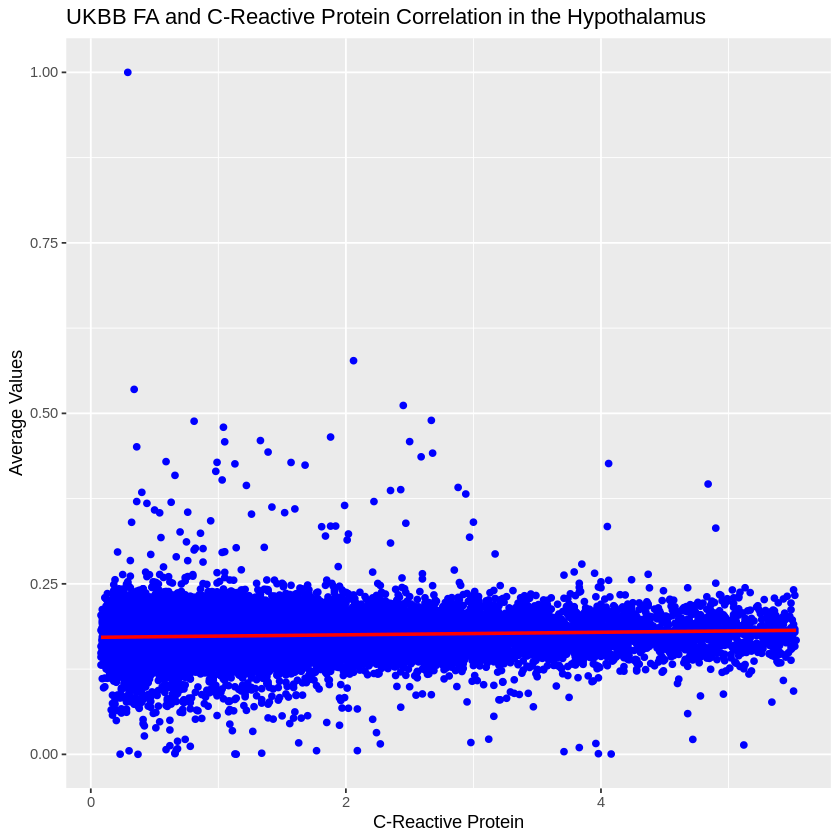

Warning message:
“Removed 2263 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 2263 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 26028 rows containing missing values (`geom_text()`).”


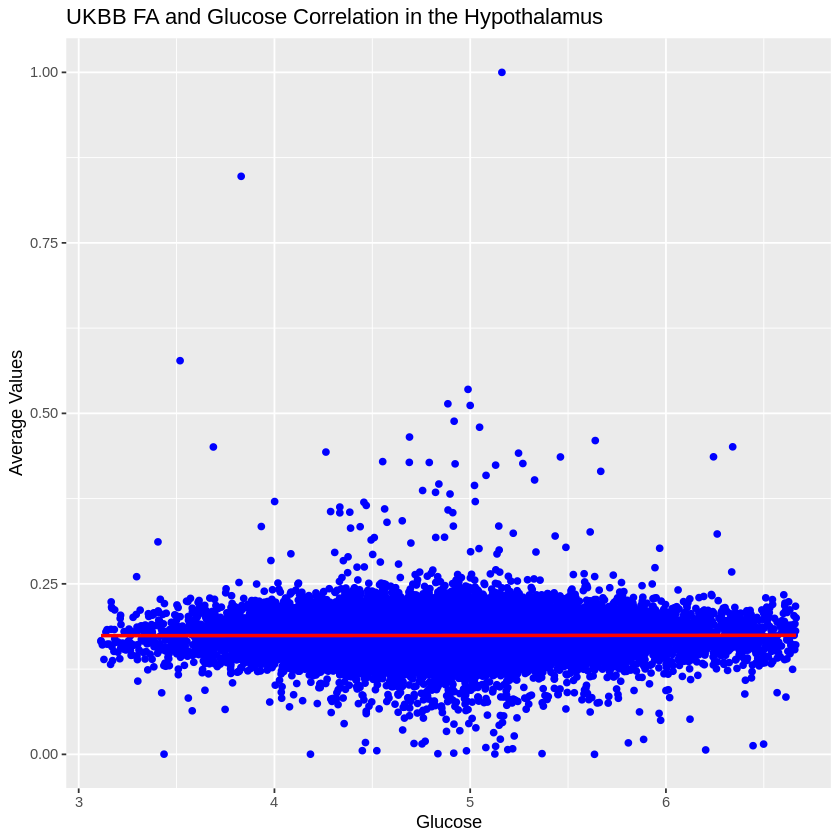

Warning message:
“Removed 1699 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 1699 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 26028 rows containing missing values (`geom_text()`).”


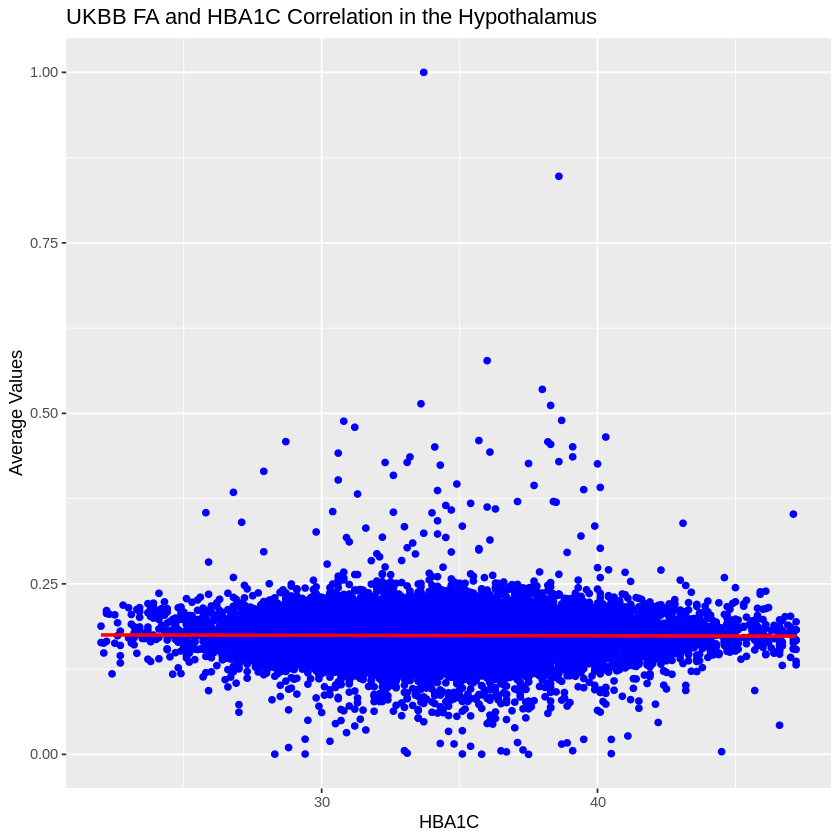

Warning message:
“Removed 1741 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 1741 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 26028 rows containing missing values (`geom_text()`).”


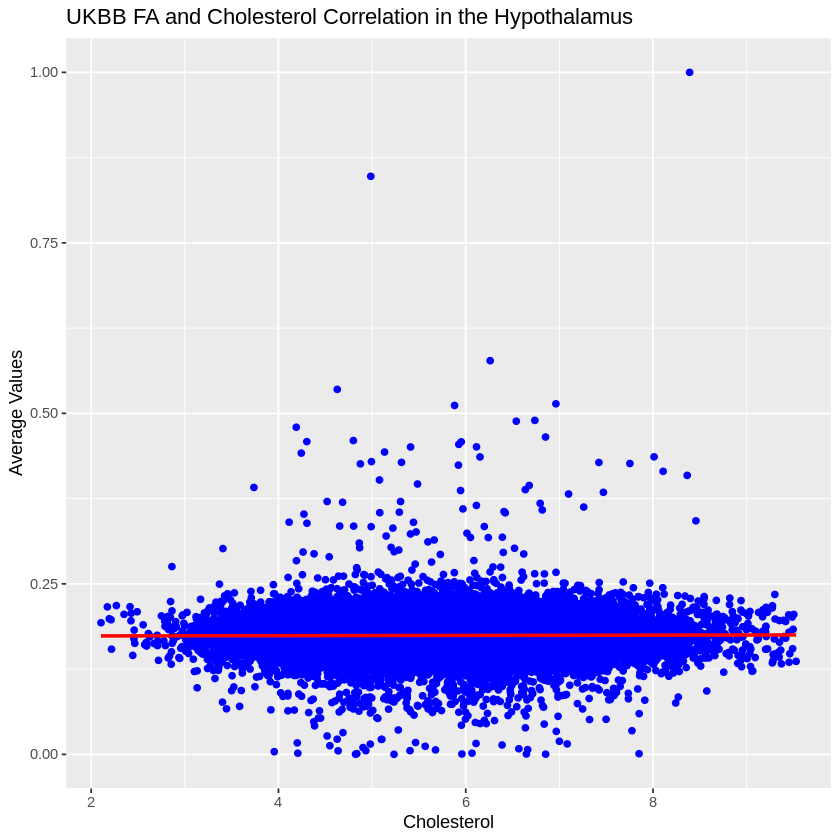

Warning message:
“Removed 3880 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 3880 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 26028 rows containing missing values (`geom_text()`).”


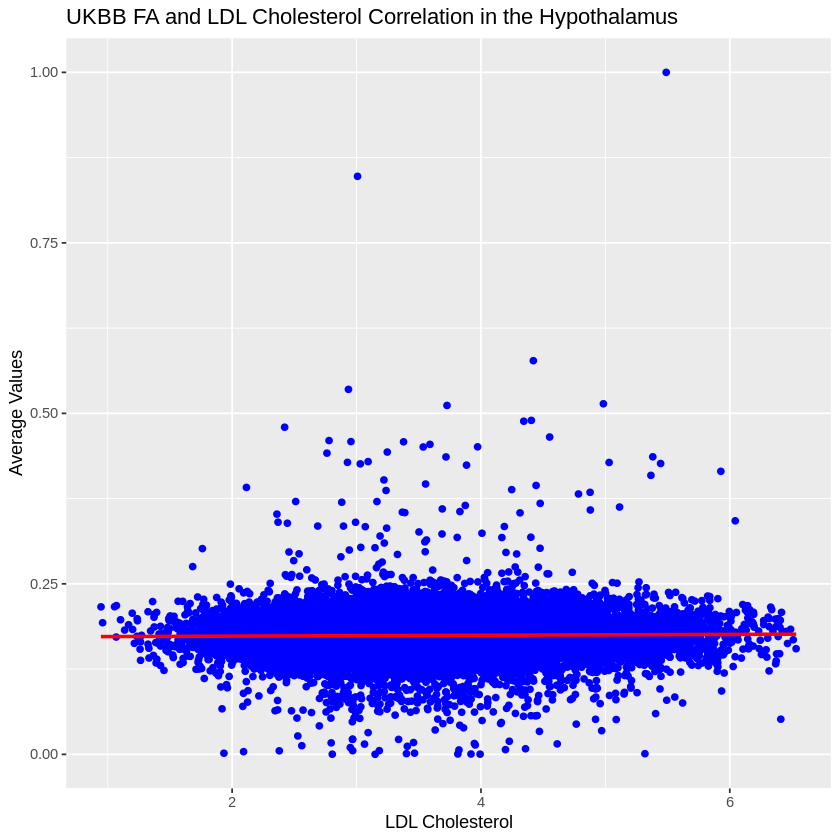

Warning message:
“Removed 2202 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 2202 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 26028 rows containing missing values (`geom_text()`).”


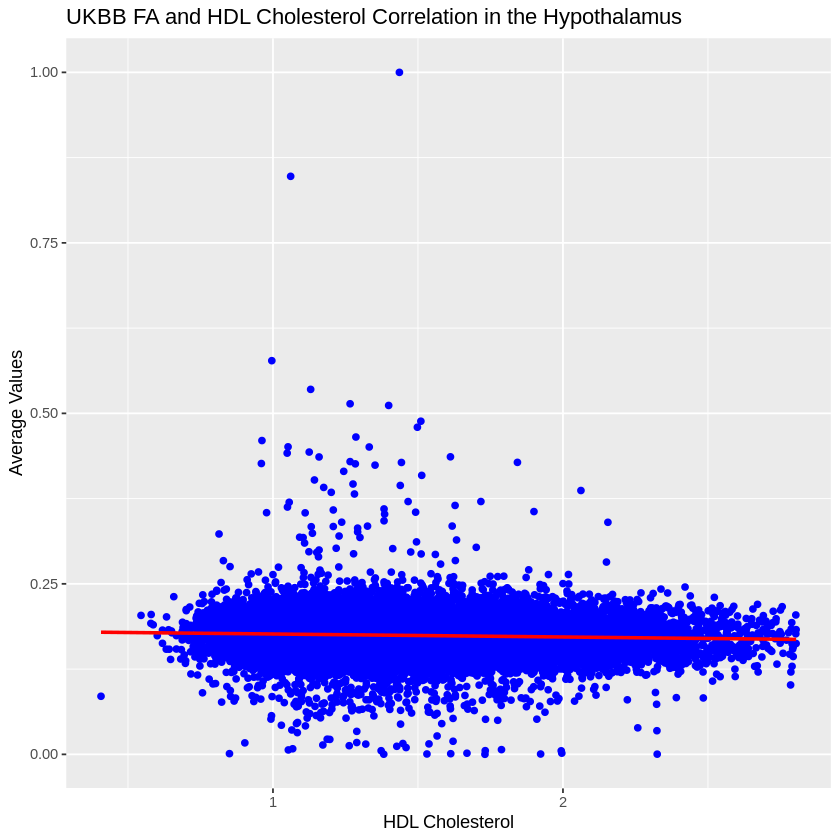

Warning message:
“Removed 2224 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 2224 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 26028 rows containing missing values (`geom_text()`).”


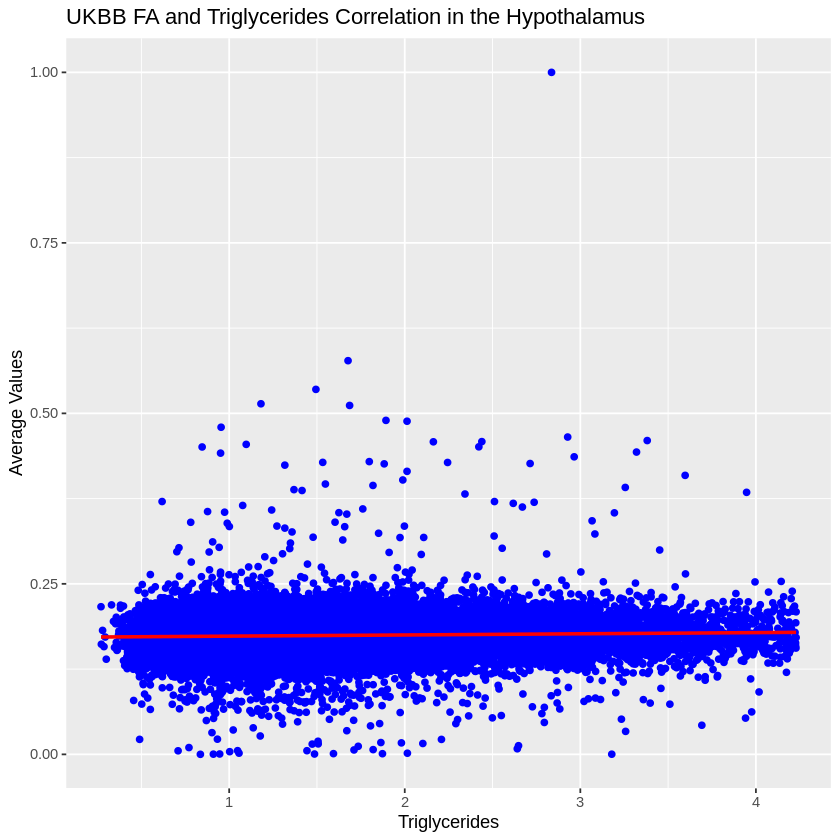

Warning message:
“Removed 2182 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 2182 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 26028 rows containing missing values (`geom_text()`).”


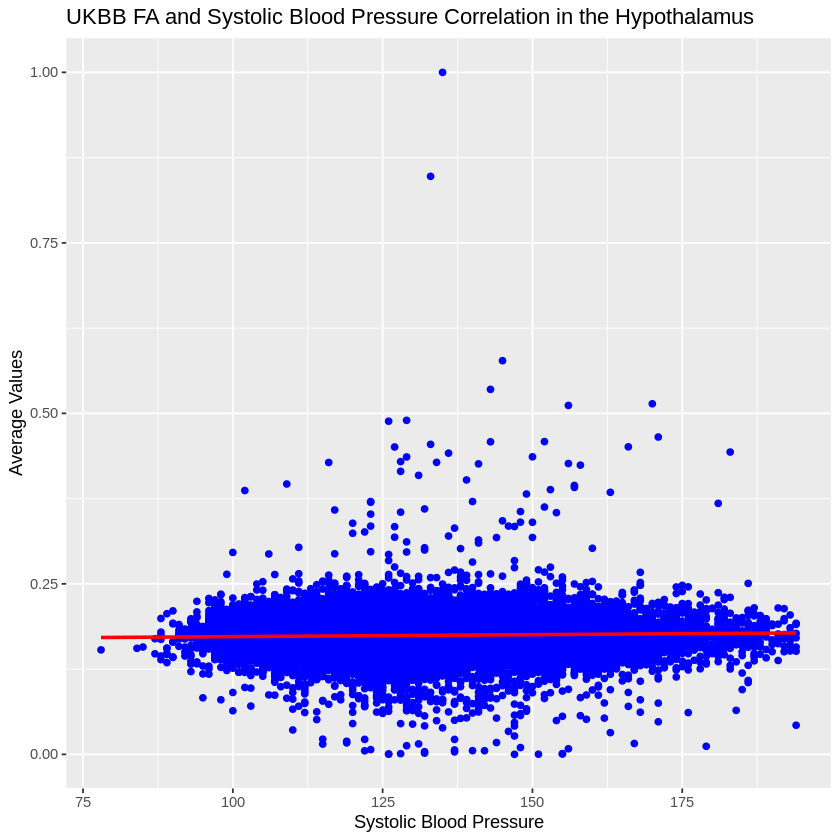

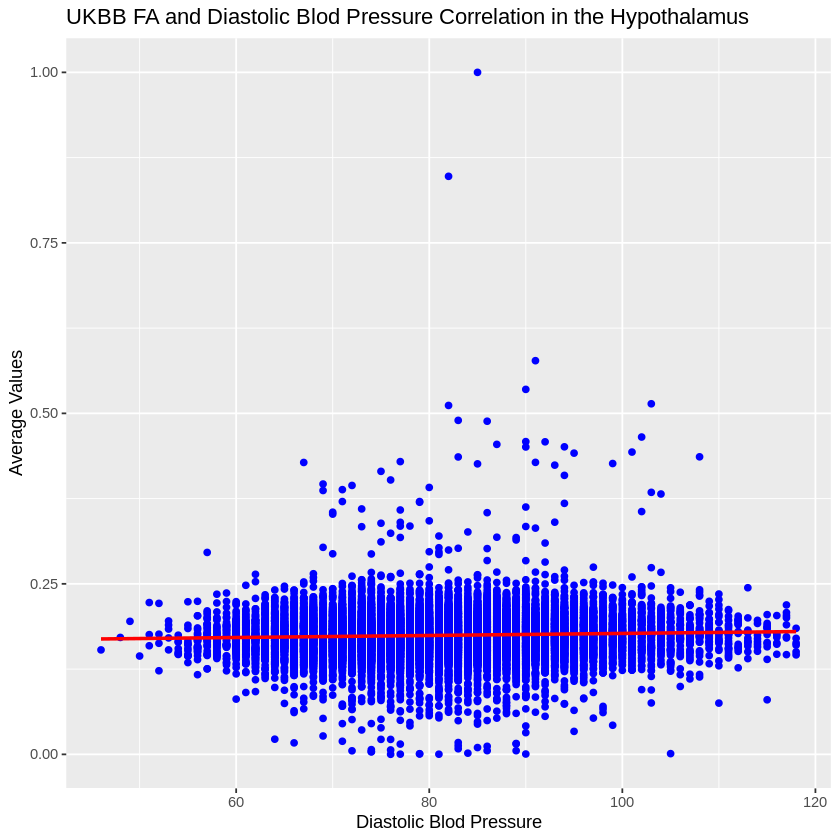

In [9]:
# Display FA plots
layout(fa_plots)
fa_c_reactive_plot
fa_glucose_plot
fa_hba1c_plot
fa_cholesterol_plot
fa_ldl_chol_plot
fa_hdl_chol_plot
fa_triglycerides_plot
fa_sys_bp_plot
fa_dia_bp_plot

In [30]:
# Calculate MD correlations with obesity-related parameters in the hypothalamus
lm <- lm(full_hypo ~ c.reactive_protein_30710.0.0+age_when_attended_assessment_centre_21003.2.0+sex_31.0.0, data=md_subj_data)
md_c_reactive <- summary(lm)
md_c_reactive
point_count <- nrow(md_subj_data)
md_c_reactive_plot <- ggplot(md_subj_data[which(md_subj_data$full_hypo>0 & md_subj_data$full_hypo<.1),], aes(x = c.reactive_protein_30710.0.0, y = full_hypo)) +
  geom_point(color = "blue") +
  geom_smooth(method = "lm", formula = y ~ x, se = TRUE, color = "red") +
  geom_text(aes(x = max(c.reactive_protein_30710.0.0), y = max(full_hypo)),
            label = paste("N =", point_count),
            hjust = 1, vjust = 1, color = "black") +
  labs(title = "UKBB MD and C-Reactive Protein Correlation in the Hypothalamus", x = "C-Reactive Protein", y = "Average Values")

lm <- lm(full_hypo ~ glucose_30740.0.0+age_when_attended_assessment_centre_21003.2.0+sex_31.0.0, data=md_subj_data)
md_glucose <- summary(lm)
md_glucose
point_count <- nrow(md_subj_data)
md_glucose_plot <- ggplot(md_subj_data[which(md_subj_data$full_hypo>0 & md_subj_data$full_hypo<.1),], aes(x = glucose_30740.0.0, y = full_hypo)) +
  geom_point(color = "blue") +
  geom_smooth(method = "lm", formula = y ~ x, se = TRUE, color = "red") +
  geom_text(aes(x = max(glucose_30740.0.0), y = max(full_hypo)),
            label = paste("N =", point_count),
            hjust = 1, vjust = 1, color = "black") +
  labs(title = "UKBB MD and Glucose Correlation in the Hypothalamus", x = "Glucose", y = "Average Values")

lm <- lm(full_hypo ~ glycated_haemoglobin_hba1c_30750.0.0+age_when_attended_assessment_centre_21003.2.0+sex_31.0.0, data=md_subj_data)
md_hba1c <- summary(lm)
md_hba1c
point_count <- nrow(md_subj_data)
md_hba1c_plot <- ggplot(md_subj_data[which(md_subj_data$full_hypo>0 & md_subj_data$full_hypo<.1),], aes(x = glycated_haemoglobin_hba1c_30750.0.0, y = full_hypo)) +
  geom_point(color = "blue") +
  geom_smooth(method = "lm", formula = y ~ x, se = TRUE, color = "red") +
  geom_text(aes(x = max(glycated_haemoglobin_hba1c_30750.0.0), y = max(full_hypo)),
            label = paste("N =", point_count),
            hjust = 1, vjust = 1, color = "black") +
  labs(title = "UKBB MD and HBA1C Correlation in the Hypothalamus", x = "HBA1C", y = "Average Values")

lm <- lm(full_hypo ~ cholesterol_30690.0.0+age_when_attended_assessment_centre_21003.2.0+sex_31.0.0, data=md_subj_data)
md_cholesterol <- summary(lm)
md_cholesterol
point_count <- nrow(md_subj_data)
md_cholesterol_plot <- ggplot(md_subj_data[which(md_subj_data$full_hypo>0 & md_subj_data$full_hypo<.1),], aes(x = cholesterol_30690.0.0, y = full_hypo)) +
  geom_point(color = "blue") +
  geom_smooth(method = "lm", formula = y ~ x, se = TRUE, color = "red") +
  geom_text(aes(x = max(cholesterol_30690.0.0), y = max(full_hypo)),
            label = paste("N =", point_count),
            hjust = 1, vjust = 1, color = "black") +
  labs(title = "UKBB MD and Cholesterol Correlation in the Hypothalamus", x = "Cholesterol", y = "Average Values")

lm <- lm(full_hypo ~ hdl_cholesterol_30760.0.0+age_when_attended_assessment_centre_21003.2.0+sex_31.0.0, data=md_subj_data)
md_hdl_chol <- summary(lm)
md_hdl_chol
point_count <- nrow(md_subj_data)
md_hdl_chol_plot <- ggplot(md_subj_data[which(md_subj_data$full_hypo>0 & md_subj_data$full_hypo<.1),], aes(x = hdl_cholesterol_30760.0.0, y = full_hypo)) +
  geom_point(color = "blue") +
  geom_smooth(method = "lm", formula = y ~ x, se = TRUE, color = "red") +
  geom_text(aes(x = max(hdl_cholesterol_30760.0.0), y = max(full_hypo)),
            label = paste("N =", point_count),
            hjust = 1, vjust = 1, color = "black") +
  labs(title = "UKBB MD and HDL Cholesterol Correlation in the Hypothalamus", x = "HDL Cholesterol", y = "Average Values")

lm <- lm(full_hypo ~ ldl_direct_30780.0.0+age_when_attended_assessment_centre_21003.2.0+sex_31.0.0, data=md_subj_data)
md_ldl_chol <- summary(lm)
md_ldl_chol
point_count <- nrow(md_subj_data)
md_ldl_chol_plot <- ggplot(md_subj_data[which(md_subj_data$full_hypo>0 & md_subj_data$full_hypo<.1),], aes(x = ldl_direct_30780.0.0, y = full_hypo)) +
  geom_point(color = "blue") +
  geom_smooth(method = "lm", formula = y ~ x, se = TRUE, color = "red") +
  geom_text(aes(x = max(ldl_direct_30780.0.0), y = max(full_hypo)),
            label = paste("N =", point_count),
            hjust = 1, vjust = 1, color = "black") +
  labs(title = "UKBB MD and LDL Cholesterol Correlation in the Hypothalamus", x = "LDL Cholesterol", y = "Average Values")

lm <- lm(full_hypo ~ triglycerides_30870.0.0+age_when_attended_assessment_centre_21003.2.0+sex_31.0.0, data=md_subj_data)
md_triglycerides <- summary(lm)
md_triglycerides
point_count <- nrow(md_subj_data)
md_triglycerides_plot <- ggplot(md_subj_data[which(md_subj_data$full_hypo>0 & md_subj_data$full_hypo<.1),], aes(x = triglycerides_30870.0.0, y = full_hypo)) +
  geom_point(color = "blue") +
  geom_smooth(method = "lm", formula = y ~ x, se = TRUE, color = "red") +
  geom_text(aes(x = max(triglycerides_30870.0.0), y = max(full_hypo)),
            label = paste("N =", point_count),
            hjust = 1, vjust = 1, color = "black") +
  labs(title = "UKBB MD and Triglycerides Correlation in the Hypothalamus", x = "Triglycerides", y = "Average Values")

lm <- lm(full_hypo ~ systolic_blood_pressure_automated_reading_4080.0.1+age_when_attended_assessment_centre_21003.2.0+sex_31.0.0, data=md_subj_data)
md_sys_bp <- summary(lm)
md_sys_bp
point_count <- nrow(md_subj_data)
md_sys_bp_plot <- ggplot(md_subj_data[which(md_subj_data$full_hypo>0 & md_subj_data$full_hypo<.1),], aes(x = systolic_blood_pressure_automated_reading_4080.0.1, y = full_hypo)) +
  geom_point(color = "blue") +
  geom_smooth(method = "lm", formula = y ~ x, se = TRUE, color = "red") +
  geom_text(aes(x = max(systolic_blood_pressure_automated_reading_4080.0.1), y = max(full_hypo)),
            label = paste("N =", point_count),
            hjust = 1, vjust = 1, color = "black") +
  labs(title = "UKBB MD and Systolic Blood Pressure Correlation in the Hypothalamus", x = "Systolic Blood Pressure", y = "Average Values")

lm <- lm(full_hypo ~ diastolic_blood_pressure_automated_reading_4079.0.1+age_when_attended_assessment_centre_21003.2.0+sex_31.0.0, data=md_subj_data)
md_dia_bp <- summary(lm)
md_dia_bp
point_count <- nrow(md_subj_data)
md_dia_bp_plot <- ggplot(md_subj_data[which(md_subj_data$full_hypo>0 & md_subj_data$full_hypo<.1),], aes(x = diastolic_blood_pressure_automated_reading_4079.0.1, y = full_hypo)) +
  geom_point(color = "blue") +
  geom_smooth(method = "lm", formula = y ~ x, se = TRUE, color = "red") +
  geom_text(aes(x = max(diastolic_blood_pressure_automated_reading_4079.0.1), y = max(full_hypo)),
            label = paste("N =", point_count),
            hjust = 1, vjust = 1, color = "black") +
  labs(title = "UKBB MD and Diastolic Blod Pressure Correlation in the Hypothalamus", x = "Diastolic Blod Pressure", y = "Average Values")


Call:
lm(formula = full_hypo ~ c.reactive_protein_30710.0.0 + age_when_attended_assessment_centre_21003.2.0 + 
    sex_31.0.0, data = md_subj_data)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.001530 -0.000086 -0.000015  0.000069  0.188268 

Coefficients:
                                                Estimate Std. Error t value
(Intercept)                                    8.192e-04  7.052e-05  11.616
c.reactive_protein_30710.0.0                  -8.010e-06  7.307e-06  -1.096
age_when_attended_assessment_centre_21003.2.0  8.621e-06  1.110e-06   7.769
sex_31.0.0Male                                 5.987e-05  1.669e-05   3.588
                                              Pr(>|t|)    
(Intercept)                                    < 2e-16 ***
c.reactive_protein_30710.0.0                  0.272957    
age_when_attended_assessment_centre_21003.2.0 8.23e-15 ***
sex_31.0.0Male                                0.000334 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’


Call:
lm(formula = full_hypo ~ glucose_30740.0.0 + age_when_attended_assessment_centre_21003.2.0 + 
    sex_31.0.0, data = md_subj_data)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.001555 -0.000086 -0.000015  0.000069  0.188274 

Coefficients:
                                               Estimate Std. Error t value
(Intercept)                                   7.774e-04  1.037e-04   7.497
glucose_30740.0.0                             7.879e-06  1.645e-05   0.479
age_when_attended_assessment_centre_21003.2.0 8.494e-06  1.179e-06   7.202
sex_31.0.0Male                                6.102e-05  1.763e-05   3.461
                                              Pr(>|t|)    
(Intercept)                                   6.79e-14 ***
glucose_30740.0.0                              0.63206    
age_when_attended_assessment_centre_21003.2.0 6.11e-13 ***
sex_31.0.0Male                                 0.00054 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ 


Call:
lm(formula = full_hypo ~ glycated_haemoglobin_hba1c_30750.0.0 + 
    age_when_attended_assessment_centre_21003.2.0 + sex_31.0.0, 
    data = md_subj_data)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.001539 -0.000085 -0.000015  0.000069  0.188277 

Coefficients:
                                                Estimate Std. Error t value
(Intercept)                                    8.286e-04  9.092e-05   9.114
glycated_haemoglobin_hba1c_30750.0.0          -6.259e-07  2.325e-06  -0.269
age_when_attended_assessment_centre_21003.2.0  8.650e-06  1.104e-06   7.836
sex_31.0.0Male                                 5.829e-05  1.602e-05   3.639
                                              Pr(>|t|)    
(Intercept)                                    < 2e-16 ***
glycated_haemoglobin_hba1c_30750.0.0          0.787765    
age_when_attended_assessment_centre_21003.2.0 4.85e-15 ***
sex_31.0.0Male                                0.000275 ***
---
Signif. codes:  0 ‘***’ 0.001 


Call:
lm(formula = full_hypo ~ cholesterol_30690.0.0 + age_when_attended_assessment_centre_21003.2.0 + 
    sex_31.0.0, data = md_subj_data)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.001558 -0.000086 -0.000014  0.000071  0.188226 

Coefficients:
                                               Estimate Std. Error t value
(Intercept)                                   7.266e-04  7.455e-05   9.746
cholesterol_30690.0.0                         1.902e-05  7.464e-06   2.549
age_when_attended_assessment_centre_21003.2.0 8.167e-06  1.047e-06   7.799
sex_31.0.0Male                                6.276e-05  1.576e-05   3.983
                                              Pr(>|t|)    
(Intercept)                                    < 2e-16 ***
cholesterol_30690.0.0                           0.0108 *  
age_when_attended_assessment_centre_21003.2.0 6.47e-15 ***
sex_31.0.0Male                                6.82e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.


Call:
lm(formula = full_hypo ~ hdl_cholesterol_30760.0.0 + age_when_attended_assessment_centre_21003.2.0 + 
    sex_31.0.0, data = md_subj_data)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.001551 -0.000086 -0.000015  0.000069  0.188274 

Coefficients:
                                               Estimate Std. Error t value
(Intercept)                                   7.869e-04  8.073e-05   9.748
hdl_cholesterol_30760.0.0                     1.878e-05  2.602e-05   0.722
age_when_attended_assessment_centre_21003.2.0 8.469e-06  1.144e-06   7.401
sex_31.0.0Male                                6.667e-05  1.915e-05   3.481
                                              Pr(>|t|)    
(Intercept)                                    < 2e-16 ***
hdl_cholesterol_30760.0.0                       0.4704    
age_when_attended_assessment_centre_21003.2.0  1.4e-13 ***
sex_31.0.0Male                                  0.0005 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.


Call:
lm(formula = full_hypo ~ ldl_direct_30780.0.0 + age_when_attended_assessment_centre_21003.2.0 + 
    sex_31.0.0, data = md_subj_data)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.001547 -0.000086 -0.000014  0.000071  0.188240 

Coefficients:
                                               Estimate Std. Error t value
(Intercept)                                   7.582e-04  7.151e-05  10.602
ldl_direct_30780.0.0                          2.020e-05  9.663e-06   2.090
age_when_attended_assessment_centre_21003.2.0 8.280e-06  1.046e-06   7.919
sex_31.0.0Male                                5.822e-05  1.568e-05   3.713
                                              Pr(>|t|)    
(Intercept)                                    < 2e-16 ***
ldl_direct_30780.0.0                          0.036616 *  
age_when_attended_assessment_centre_21003.2.0  2.5e-15 ***
sex_31.0.0Male                                0.000205 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1


Call:
lm(formula = full_hypo ~ triglycerides_30870.0.0 + age_when_attended_assessment_centre_21003.2.0 + 
    sex_31.0.0, data = md_subj_data)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.001571 -0.000085 -0.000014  0.000071  0.188263 

Coefficients:
                                               Estimate Std. Error t value
(Intercept)                                   8.016e-04  6.801e-05  11.786
triglycerides_30870.0.0                       1.371e-05  1.090e-05   1.258
age_when_attended_assessment_centre_21003.2.0 8.441e-06  1.063e-06   7.941
sex_31.0.0Male                                5.332e-05  1.656e-05   3.220
                                              Pr(>|t|)    
(Intercept)                                    < 2e-16 ***
triglycerides_30870.0.0                        0.20847    
age_when_attended_assessment_centre_21003.2.0 2.09e-15 ***
sex_31.0.0Male                                 0.00128 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 


Call:
lm(formula = full_hypo ~ systolic_blood_pressure_automated_reading_4080.0.1 + 
    age_when_attended_assessment_centre_21003.2.0 + sex_31.0.0, 
    data = md_subj_data)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.001537 -0.000085 -0.000013  0.000070  0.188277 

Coefficients:
                                                     Estimate Std. Error
(Intercept)                                         8.334e-04  8.044e-05
systolic_blood_pressure_automated_reading_4080.0.1 -1.817e-07  4.903e-07
age_when_attended_assessment_centre_21003.2.0       8.589e-06  1.101e-06
sex_31.0.0Male                                      6.083e-05  1.634e-05
                                                   t value Pr(>|t|)    
(Intercept)                                         10.360  < 2e-16 ***
systolic_blood_pressure_automated_reading_4080.0.1  -0.371 0.710937    
age_when_attended_assessment_centre_21003.2.0        7.800 6.44e-15 ***
sex_31.0.0Male                            


Call:
lm(formula = full_hypo ~ diastolic_blood_pressure_automated_reading_4079.0.1 + 
    age_when_attended_assessment_centre_21003.2.0 + sex_31.0.0, 
    data = md_subj_data)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.001538 -0.000084 -0.000013  0.000070  0.188277 

Coefficients:
                                                     Estimate Std. Error
(Intercept)                                         7.968e-04  9.077e-05
diastolic_blood_pressure_automated_reading_4079.0.1 2.794e-07  8.205e-07
age_when_attended_assessment_centre_21003.2.0       8.445e-06  1.058e-06
sex_31.0.0Male                                      5.836e-05  1.634e-05
                                                    t value Pr(>|t|)    
(Intercept)                                           8.779  < 2e-16 ***
diastolic_blood_pressure_automated_reading_4079.0.1   0.341 0.733453    
age_when_attended_assessment_centre_21003.2.0         7.980 1.52e-15 ***
sex_31.0.0Male                       

Warning message:
“Removed 3232 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 3232 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 26027 rows containing missing values (`geom_text()`).”
Warning message:
“Removed 4479 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 4479 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 26027 rows containing missing values (`geom_text()`).”


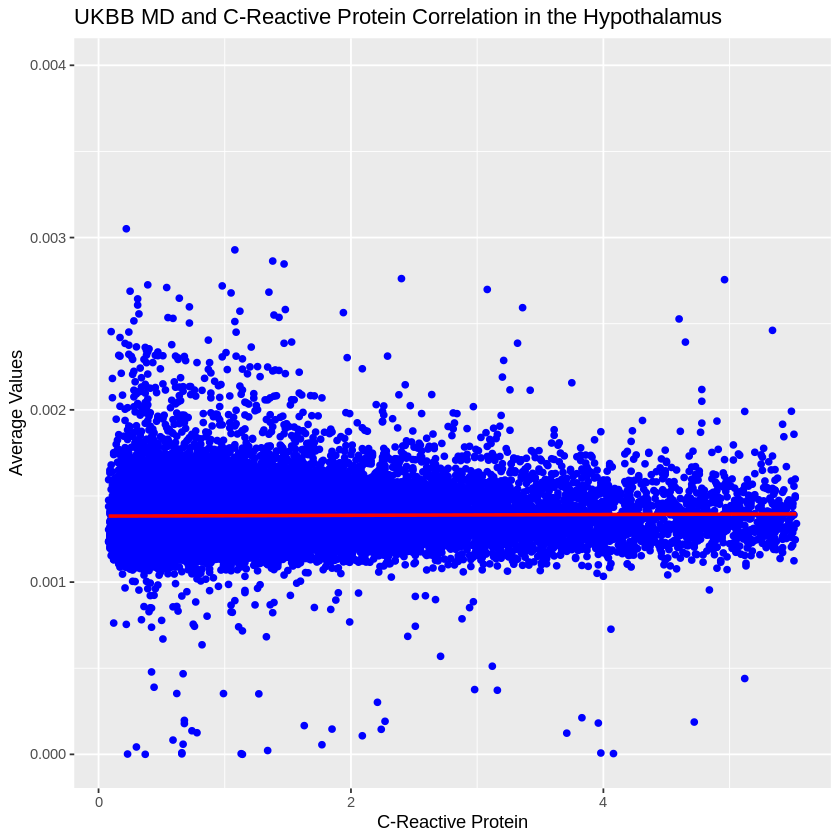

Warning message:
“Removed 2263 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 2263 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 26027 rows containing missing values (`geom_text()`).”


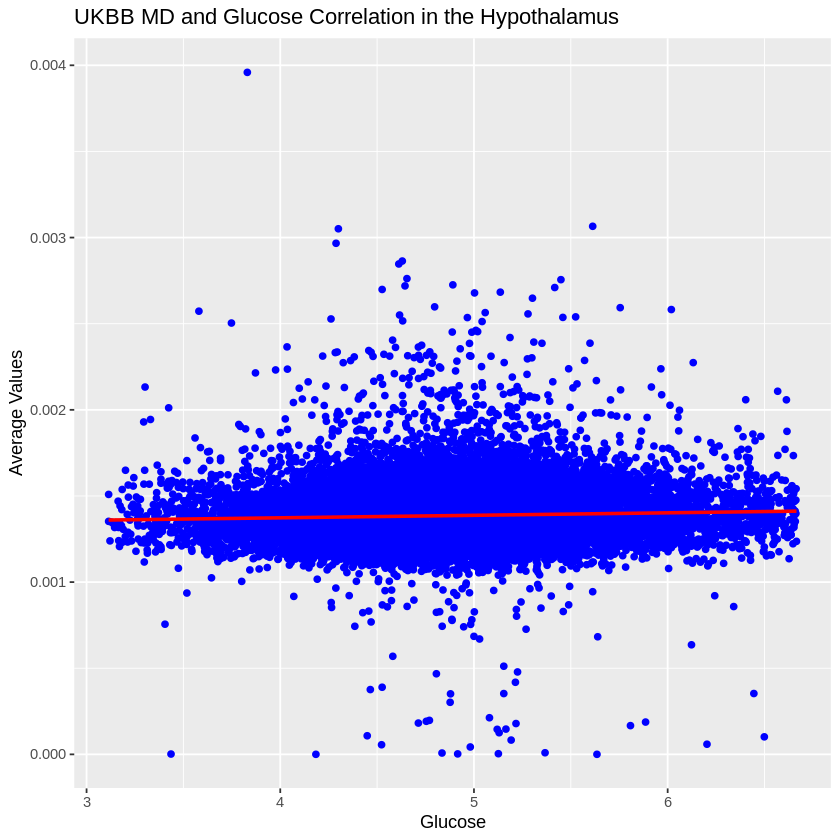

Warning message:
“Removed 1699 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 1699 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 26027 rows containing missing values (`geom_text()`).”


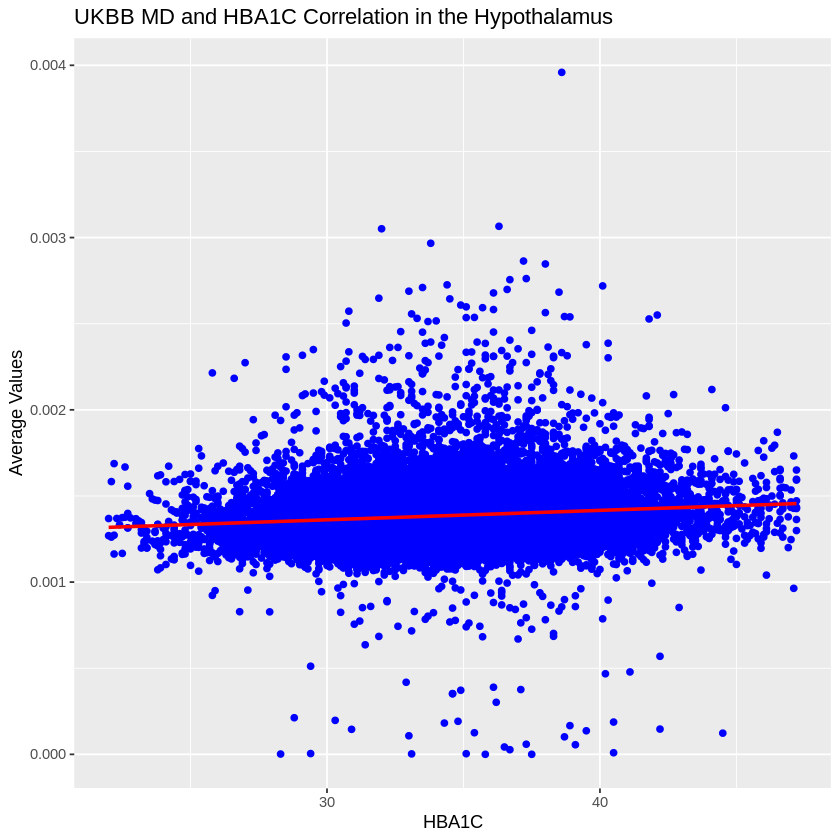

Warning message:
“Removed 1741 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 1741 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 26027 rows containing missing values (`geom_text()`).”


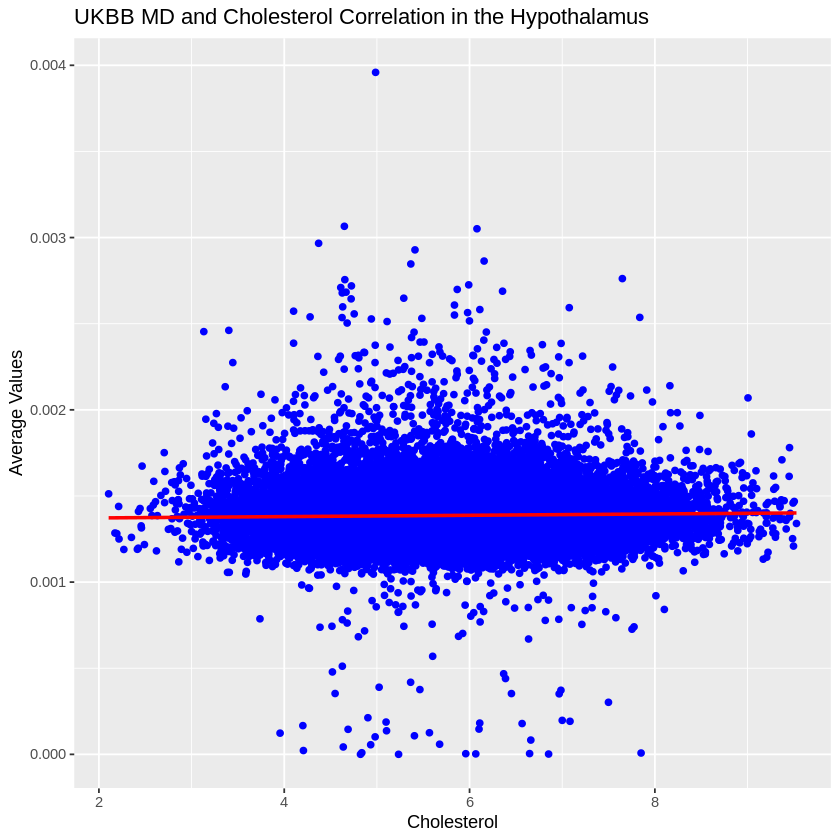

Warning message:
“Removed 3880 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 3880 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 26027 rows containing missing values (`geom_text()`).”


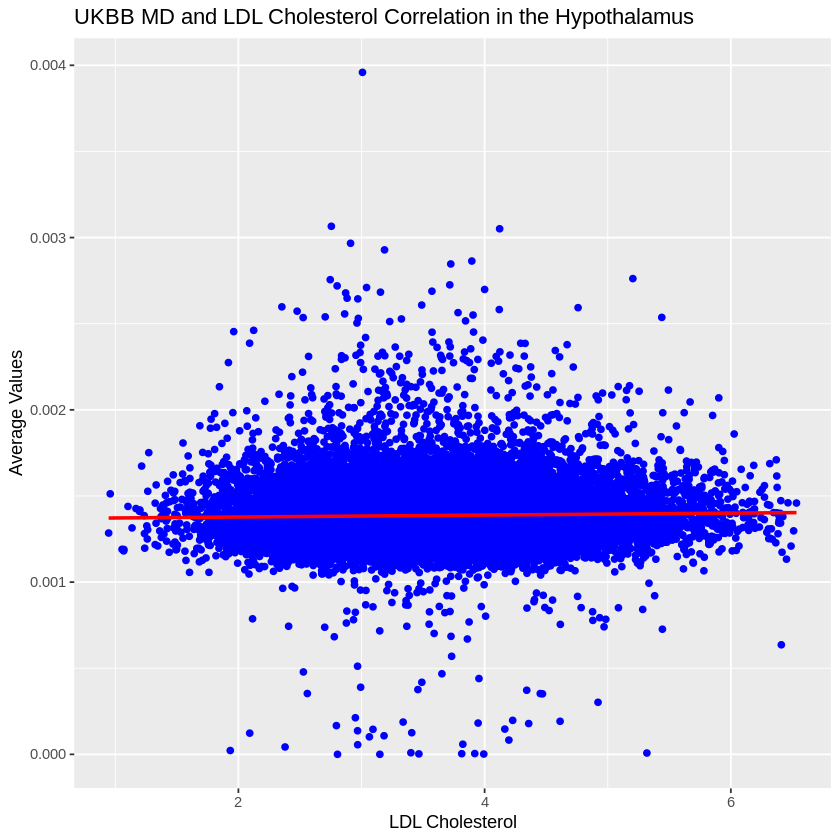

Warning message:
“Removed 2202 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 2202 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 26027 rows containing missing values (`geom_text()`).”


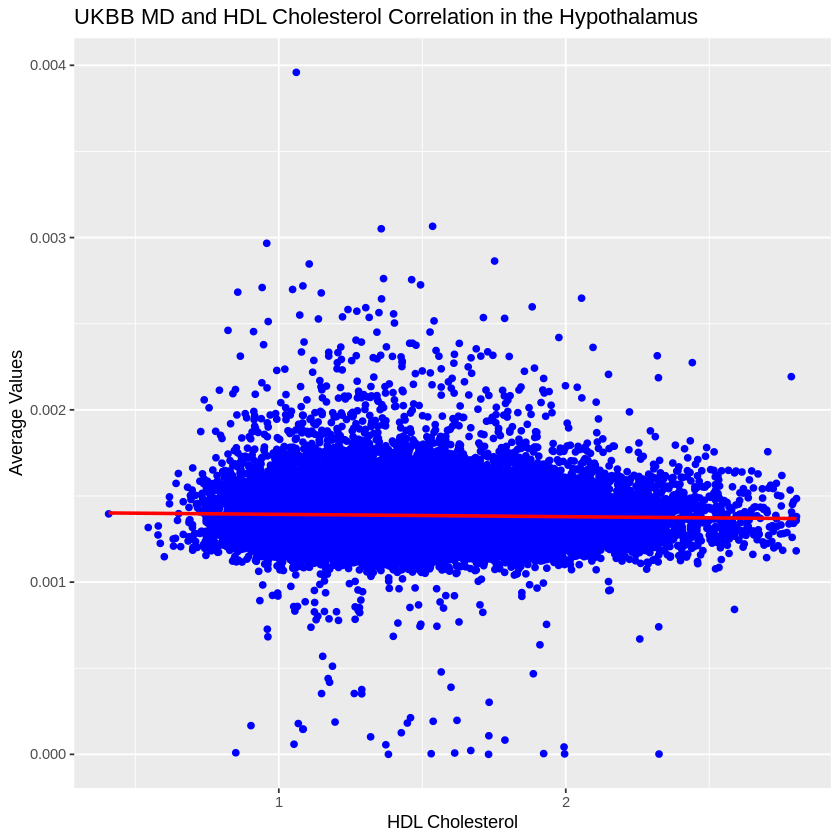

Warning message:
“Removed 2224 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 2224 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 26027 rows containing missing values (`geom_text()`).”


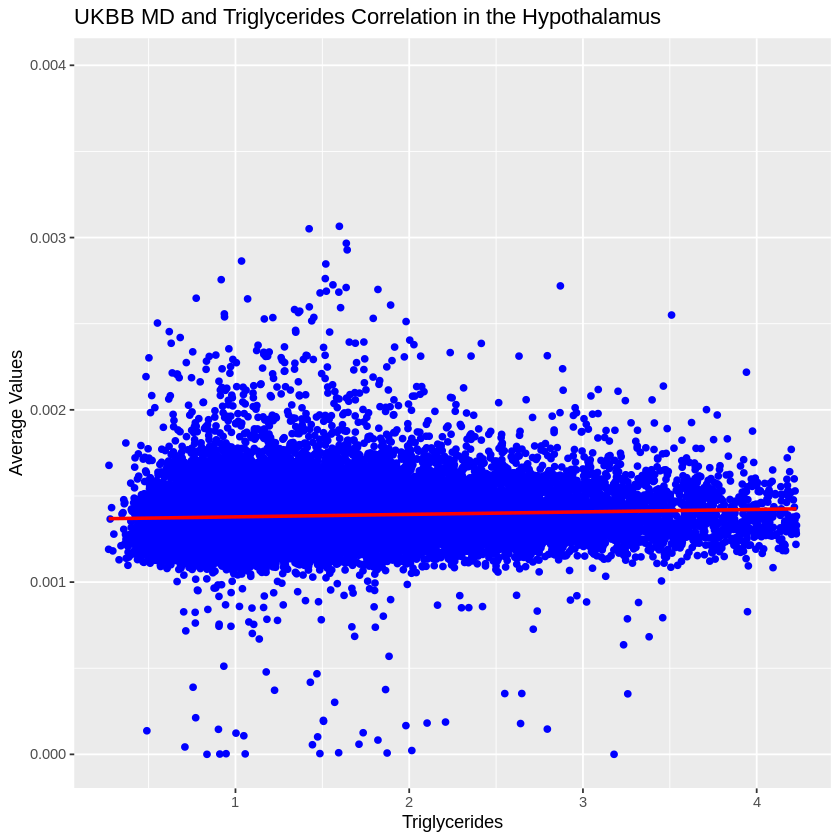

Warning message:
“Removed 2182 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 2182 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 26027 rows containing missing values (`geom_text()`).”


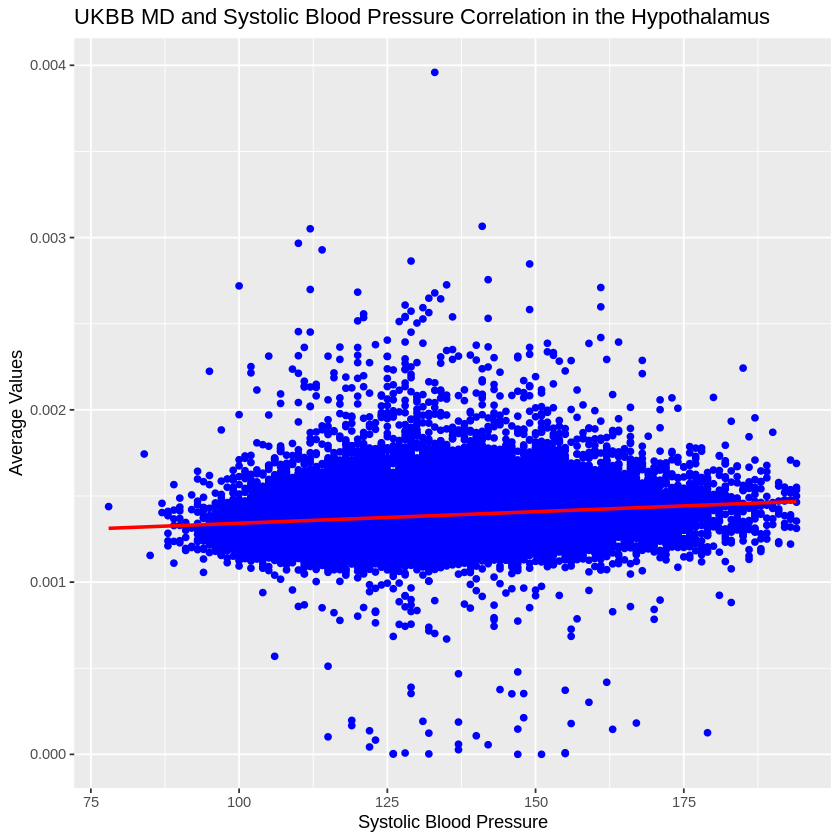

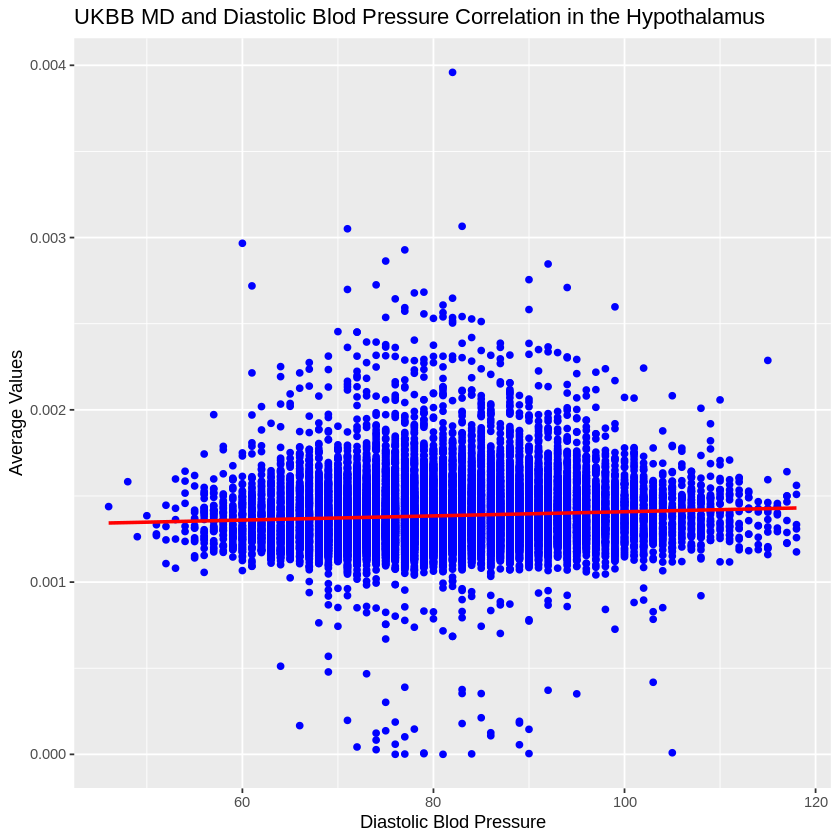

In [21]:
# Display MD plots
md_c_reactive_plot
md_glucose_plot
md_hba1c_plot
md_cholesterol_plot
md_ldl_chol_plot
md_hdl_chol_plot
md_triglycerides_plot
md_sys_bp_plot
md_dia_bp_plot

In [31]:
# Calculate RD correlations with obesity-related parameters in the hypothalamus
lm <- lm(full_hypo ~ c.reactive_protein_30710.0.0+age_when_attended_assessment_centre_21003.2.0+sex_31.0.0, data=rd_subj_data)
rd_c_reactive <- summary(lm)
rd_c_reactive
point_count <- nrow(rd_subj_data)
rd_c_reactive_plot <- ggplot(rd_subj_data[which(rd_subj_data$full_hypo>0),], aes(x = c.reactive_protein_30710.0.0, y = full_hypo)) +
  geom_point(color = "blue") +
  geom_smooth(method = "lm", formula = y ~ x, se = TRUE, color = "red") +
  geom_text(aes(x = max(c.reactive_protein_30710.0.0), y = max(full_hypo)),
            label = paste("N =", point_count),
            hjust = 1, vjust = 1, color = "black") +
  labs(title = "UKBB RD and C-Reactive Protein Correlation in the Hypothalamus", x = "C-Reactive Protein", y = "Average Values")

lm <- lm(full_hypo ~ glucose_30740.0.0+age_when_attended_assessment_centre_21003.2.0+sex_31.0.0, data=rd_subj_data)
rd_glucose <- summary(lm)
rd_glucose
point_count <- nrow(rd_subj_data)
rd_glucose_plot <- ggplot(rd_subj_data[which(rd_subj_data$full_hypo>0),], aes(x = glucose_30740.0.0, y = full_hypo)) +
  geom_point(color = "blue") +
  geom_smooth(method = "lm", formula = y ~ x, se = TRUE, color = "red") +
  geom_text(aes(x = max(glucose_30740.0.0), y = max(full_hypo)),
            label = paste("N =", point_count),
            hjust = 1, vjust = 1, color = "black") +
  labs(title = "UKBB RD and Glucose Correlation in the Hypothalamus", x = "Glucose", y = "Average Values")

lm <- lm(full_hypo ~ glycated_haemoglobin_hba1c_30750.0.0+age_when_attended_assessment_centre_21003.2.0+sex_31.0.0, data=rd_subj_data)
rd_hba1c <- summary(lm)
rd_hba1c
point_count <- nrow(rd_subj_data)
rd_hba1c_plot <- ggplot(rd_subj_data[which(rd_subj_data$full_hypo>0),], aes(x = glycated_haemoglobin_hba1c_30750.0.0, y = full_hypo)) +
  geom_point(color = "blue") +
  geom_smooth(method = "lm", formula = y ~ x, se = TRUE, color = "red") +
  geom_text(aes(x = max(glycated_haemoglobin_hba1c_30750.0.0), y = max(full_hypo)),
            label = paste("N =", point_count),
            hjust = 1, vjust = 1, color = "black") +
  labs(title = "UKBB RD and HBA1C Correlation in the Hypothalamus", x = "HBA1C", y = "Average Values")

lm <- lm(full_hypo ~ cholesterol_30690.0.0+age_when_attended_assessment_centre_21003.2.0+sex_31.0.0, data=rd_subj_data)
rd_cholesterol <- summary(lm)
rd_cholesterol
point_count <- nrow(rd_subj_data)
rd_cholesterol_plot <- ggplot(rd_subj_data[which(rd_subj_data$full_hypo>0),], aes(x = cholesterol_30690.0.0, y = full_hypo)) +
  geom_point(color = "blue") +
  geom_smooth(method = "lm", formula = y ~ x, se = TRUE, color = "red") +
  geom_text(aes(x = max(cholesterol_30690.0.0), y = max(full_hypo)),
            label = paste("N =", point_count),
            hjust = 1, vjust = 1, color = "black") +
  labs(title = "UKBB RD and Cholesterol Correlation in the Hypothalamus", x = "Cholesterol", y = "Average Values")

lm <- lm(full_hypo ~ hdl_cholesterol_30760.0.0+age_when_attended_assessment_centre_21003.2.0+sex_31.0.0, data=rd_subj_data)
rd_hdl_chol <- summary(lm)
rd_hdl_chol
point_count <- nrow(rd_subj_data)
rd_hdl_chol_plot <- ggplot(rd_subj_data[which(rd_subj_data$full_hypo>0),], aes(x = hdl_cholesterol_30760.0.0, y = full_hypo)) +
  geom_point(color = "blue") +
  geom_smooth(method = "lm", formula = y ~ x, se = TRUE, color = "red") +
  geom_text(aes(x = max(hdl_cholesterol_30760.0.0), y = max(full_hypo)),
            label = paste("N =", point_count),
            hjust = 1, vjust = 1, color = "black") +
  labs(title = "UKBB RD and HDL Cholesterol Correlation in the Hypothalamus", x = "HDL Cholesterol", y = "Average Values")

lm <- lm(full_hypo ~ ldl_direct_30780.0.0+age_when_attended_assessment_centre_21003.2.0+sex_31.0.0, data=rd_subj_data)
rd_ldl_chol <- summary(lm)
rd_ldl_chol
point_count <- nrow(rd_subj_data)
rd_ldl_chol_plot <- ggplot(rd_subj_data[which(rd_subj_data$full_hypo>0),], aes(x = ldl_direct_30780.0.0, y = full_hypo)) +
  geom_point(color = "blue") +
  geom_smooth(method = "lm", formula = y ~ x, se = TRUE, color = "red") +
  geom_text(aes(x = max(ldl_direct_30780.0.0), y = max(full_hypo)),
            label = paste("N =", point_count),
            hjust = 1, vjust = 1, color = "black") +
  labs(title = "UKBB RD and LDL Cholesterol Correlation in the Hypothalamus", x = "LDL Cholesterol", y = "Average Values")

lm <- lm(full_hypo ~ triglycerides_30870.0.0+age_when_attended_assessment_centre_21003.2.0+sex_31.0.0, data=rd_subj_data)
rd_triglycerides <- summary(lm)
rd_triglycerides
point_count <- nrow(rd_subj_data)
rd_triglycerides_plot <- ggplot(rd_subj_data[which(rd_subj_data$full_hypo>0),], aes(x = triglycerides_30870.0.0, y = full_hypo)) +
  geom_point(color = "blue") +
  geom_smooth(method = "lm", formula = y ~ x, se = TRUE, color = "red") +
  geom_text(aes(x = max(triglycerides_30870.0.0), y = max(full_hypo)),
            label = paste("N =", point_count),
            hjust = 1, vjust = 1, color = "black") +
  labs(title = "UKBB RD and Triglycerides Correlation in the Hypothalamus", x = "Triglycerides", y = "Average Values")

lm <- lm(full_hypo ~ systolic_blood_pressure_automated_reading_4080.0.1+age_when_attended_assessment_centre_21003.2.0+sex_31.0.0, data=rd_subj_data)
rd_sys_bp <- summary(lm)
rd_sys_bp
point_count <- nrow(rd_subj_data)
rd_sys_bp_plot <- ggplot(rd_subj_data[which(rd_subj_data$full_hypo>0),], aes(x = systolic_blood_pressure_automated_reading_4080.0.1, y = full_hypo)) +
  geom_point(color = "blue") +
  geom_smooth(method = "lm", formula = y ~ x, se = TRUE, color = "red") +
  geom_text(aes(x = max(systolic_blood_pressure_automated_reading_4080.0.1), y = max(full_hypo)),
            label = paste("N =", point_count),
            hjust = 1, vjust = 1, color = "black") +
  labs(title = "UKBB RD and Systolic Blood Pressure Correlation in the Hypothalamus", x = "Systolic Blood Pressure", y = "Average Values")

lm <- lm(full_hypo ~ diastolic_blood_pressure_automated_reading_4079.0.1+age_when_attended_assessment_centre_21003.2.0+sex_31.0.0, data=rd_subj_data)
rd_dia_bp <- summary(lm)
rd_dia_bp
point_count <- nrow(rd_subj_data)
rd_dia_bp_plot <- ggplot(rd_subj_data[which(rd_subj_data$full_hypo>0),], aes(x = diastolic_blood_pressure_automated_reading_4079.0.1, y = full_hypo)) +
  geom_point(color = "blue") +
  geom_smooth(method = "lm", formula = y ~ x, se = TRUE, color = "red") +
  geom_text(aes(x = max(diastolic_blood_pressure_automated_reading_4079.0.1), y = max(full_hypo)),
            label = paste("N =", point_count),
            hjust = 1, vjust = 1, color = "black") +
  labs(title = "UKBB RD and Diastolic Blod Pressure Correlation in the Hypothalamus", x = "Diastolic Blod Pressure", y = "Average Values")


Call:
lm(formula = full_hypo ~ c.reactive_protein_30710.0.0 + age_when_attended_assessment_centre_21003.2.0 + 
    sex_31.0.0, data = rd_subj_data)

Residuals:
       Min         1Q     Median         3Q        Max 
-1.380e-03 -7.689e-05 -7.150e-06  7.486e-05  1.704e-03 

Coefficients:
                                                Estimate Std. Error t value
(Intercept)                                    7.524e-04  1.076e-05  69.936
c.reactive_protein_30710.0.0                  -2.708e-06  1.115e-06  -2.429
age_when_attended_assessment_centre_21003.2.0  7.725e-06  1.693e-07  45.632
sex_31.0.0Male                                 4.162e-05  2.546e-06  16.346
                                              Pr(>|t|)    
(Intercept)                                     <2e-16 ***
c.reactive_protein_30710.0.0                    0.0151 *  
age_when_attended_assessment_centre_21003.2.0   <2e-16 ***
sex_31.0.0Male                                  <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**


Call:
lm(formula = full_hypo ~ glucose_30740.0.0 + age_when_attended_assessment_centre_21003.2.0 + 
    sex_31.0.0, data = rd_subj_data)

Residuals:
       Min         1Q     Median         3Q        Max 
-1.407e-03 -7.643e-05 -6.430e-06  7.553e-05  1.748e-03 

Coefficients:
                                                Estimate Std. Error t value
(Intercept)                                    7.495e-04  1.546e-05  48.466
glucose_30740.0.0                             -8.188e-08  2.454e-06  -0.033
age_when_attended_assessment_centre_21003.2.0  7.708e-06  1.759e-07  43.824
sex_31.0.0Male                                 4.171e-05  2.630e-06  15.862
                                              Pr(>|t|)    
(Intercept)                                     <2e-16 ***
glucose_30740.0.0                                0.973    
age_when_attended_assessment_centre_21003.2.0   <2e-16 ***
sex_31.0.0Male                                  <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 


Call:
lm(formula = full_hypo ~ glycated_haemoglobin_hba1c_30750.0.0 + 
    age_when_attended_assessment_centre_21003.2.0 + sex_31.0.0, 
    data = rd_subj_data)

Residuals:
       Min         1Q     Median         3Q        Max 
-1.392e-03 -7.630e-05 -6.880e-06  7.437e-05  1.747e-03 

Coefficients:
                                               Estimate Std. Error t value
(Intercept)                                   7.476e-04  1.422e-05  52.586
glycated_haemoglobin_hba1c_30750.0.0          5.055e-09  3.635e-07   0.014
age_when_attended_assessment_centre_21003.2.0 7.748e-06  1.726e-07  44.890
sex_31.0.0Male                                4.024e-05  2.505e-06  16.065
                                              Pr(>|t|)    
(Intercept)                                     <2e-16 ***
glycated_haemoglobin_hba1c_30750.0.0             0.989    
age_when_attended_assessment_centre_21003.2.0   <2e-16 ***
sex_31.0.0Male                                  <2e-16 ***
---
Signif. codes:  0 ‘***’ 0


Call:
lm(formula = full_hypo ~ cholesterol_30690.0.0 + age_when_attended_assessment_centre_21003.2.0 + 
    sex_31.0.0, data = rd_subj_data)

Residuals:
       Min         1Q     Median         3Q        Max 
-1.408e-03 -7.675e-05 -6.810e-06  7.543e-05  1.746e-03 

Coefficients:
                                                Estimate Std. Error t value
(Intercept)                                    7.533e-04  1.183e-05  63.684
cholesterol_30690.0.0                         -6.597e-07  1.184e-06  -0.557
age_when_attended_assessment_centre_21003.2.0  7.722e-06  1.661e-07  46.482
sex_31.0.0Male                                 4.039e-05  2.500e-06  16.159
                                              Pr(>|t|)    
(Intercept)                                     <2e-16 ***
cholesterol_30690.0.0                            0.577    
age_when_attended_assessment_centre_21003.2.0   <2e-16 ***
sex_31.0.0Male                                  <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 


Call:
lm(formula = full_hypo ~ hdl_cholesterol_30760.0.0 + age_when_attended_assessment_centre_21003.2.0 + 
    sex_31.0.0, data = rd_subj_data)

Residuals:
       Min         1Q     Median         3Q        Max 
-1.403e-03 -7.651e-05 -6.580e-06  7.587e-05  1.749e-03 

Coefficients:
                                               Estimate Std. Error t value
(Intercept)                                   7.299e-04  1.226e-05  59.549
hdl_cholesterol_30760.0.0                     1.394e-05  3.951e-06   3.528
age_when_attended_assessment_centre_21003.2.0 7.653e-06  1.737e-07  44.045
sex_31.0.0Male                                4.621e-05  2.908e-06  15.891
                                              Pr(>|t|)    
(Intercept)                                    < 2e-16 ***
hdl_cholesterol_30760.0.0                     0.000419 ***
age_when_attended_assessment_centre_21003.2.0  < 2e-16 ***
sex_31.0.0Male                                 < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘


Call:
lm(formula = full_hypo ~ ldl_direct_30780.0.0 + age_when_attended_assessment_centre_21003.2.0 + 
    sex_31.0.0, data = rd_subj_data)

Residuals:
       Min         1Q     Median         3Q        Max 
-1.408e-03 -7.662e-05 -6.780e-06  7.554e-05  1.744e-03 

Coefficients:
                                                Estimate Std. Error t value
(Intercept)                                    7.580e-04  1.134e-05  66.842
ldl_direct_30780.0.0                          -2.700e-06  1.532e-06  -1.762
age_when_attended_assessment_centre_21003.2.0  7.739e-06  1.658e-07  46.669
sex_31.0.0Male                                 4.026e-05  2.486e-06  16.193
                                              Pr(>|t|)    
(Intercept)                                     <2e-16 ***
ldl_direct_30780.0.0                             0.078 .  
age_when_attended_assessment_centre_21003.2.0   <2e-16 ***
sex_31.0.0Male                                  <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘


Call:
lm(formula = full_hypo ~ triglycerides_30870.0.0 + age_when_attended_assessment_centre_21003.2.0 + 
    sex_31.0.0, data = rd_subj_data)

Residuals:
       Min         1Q     Median         3Q        Max 
-1.404e-03 -7.692e-05 -6.900e-06  7.514e-05  1.748e-03 

Coefficients:
                                                Estimate Std. Error t value
(Intercept)                                    7.523e-04  1.072e-05   70.19
triglycerides_30870.0.0                       -3.900e-06  1.718e-06   -2.27
age_when_attended_assessment_centre_21003.2.0  7.757e-06  1.675e-07   46.30
sex_31.0.0Male                                 4.238e-05  2.609e-06   16.24
                                              Pr(>|t|)    
(Intercept)                                     <2e-16 ***
triglycerides_30870.0.0                         0.0232 *  
age_when_attended_assessment_centre_21003.2.0   <2e-16 ***
sex_31.0.0Male                                  <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.0


Call:
lm(formula = full_hypo ~ systolic_blood_pressure_automated_reading_4080.0.1 + 
    age_when_attended_assessment_centre_21003.2.0 + sex_31.0.0, 
    data = rd_subj_data)

Residuals:
       Min         1Q     Median         3Q        Max 
-1.390e-03 -7.599e-05 -6.220e-06  7.562e-05  1.750e-03 

Coefficients:
                                                     Estimate Std. Error
(Intercept)                                         7.684e-04  1.265e-05
systolic_blood_pressure_automated_reading_4080.0.1 -1.769e-07  7.707e-08
age_when_attended_assessment_centre_21003.2.0       7.764e-06  1.731e-07
sex_31.0.0Male                                      4.285e-05  2.569e-06
                                                   t value Pr(>|t|)    
(Intercept)                                         60.763   <2e-16 ***
systolic_blood_pressure_automated_reading_4080.0.1  -2.296   0.0217 *  
age_when_attended_assessment_centre_21003.2.0       44.851   <2e-16 ***
sex_31.0.0Male                  


Call:
lm(formula = full_hypo ~ diastolic_blood_pressure_automated_reading_4079.0.1 + 
    age_when_attended_assessment_centre_21003.2.0 + sex_31.0.0, 
    data = rd_subj_data)

Residuals:
       Min         1Q     Median         3Q        Max 
-1.391e-03 -7.592e-05 -6.040e-06  7.520e-05  1.748e-03 

Coefficients:
                                                      Estimate Std. Error
(Intercept)                                          7.533e-04  1.429e-05
diastolic_blood_pressure_automated_reading_4079.0.1 -5.644e-09  1.292e-07
age_when_attended_assessment_centre_21003.2.0        7.648e-06  1.666e-07
sex_31.0.0Male                                       4.166e-05  2.572e-06
                                                    t value Pr(>|t|)    
(Intercept)                                          52.702   <2e-16 ***
diastolic_blood_pressure_automated_reading_4079.0.1  -0.044    0.965    
age_when_attended_assessment_centre_21003.2.0        45.896   <2e-16 ***
sex_31.0.0Male        

Warning message:
“Removed 3232 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 3232 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 26027 rows containing missing values (`geom_text()`).”
Warning message:
“Removed 4479 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 4479 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 26027 rows containing missing values (`geom_text()`).”


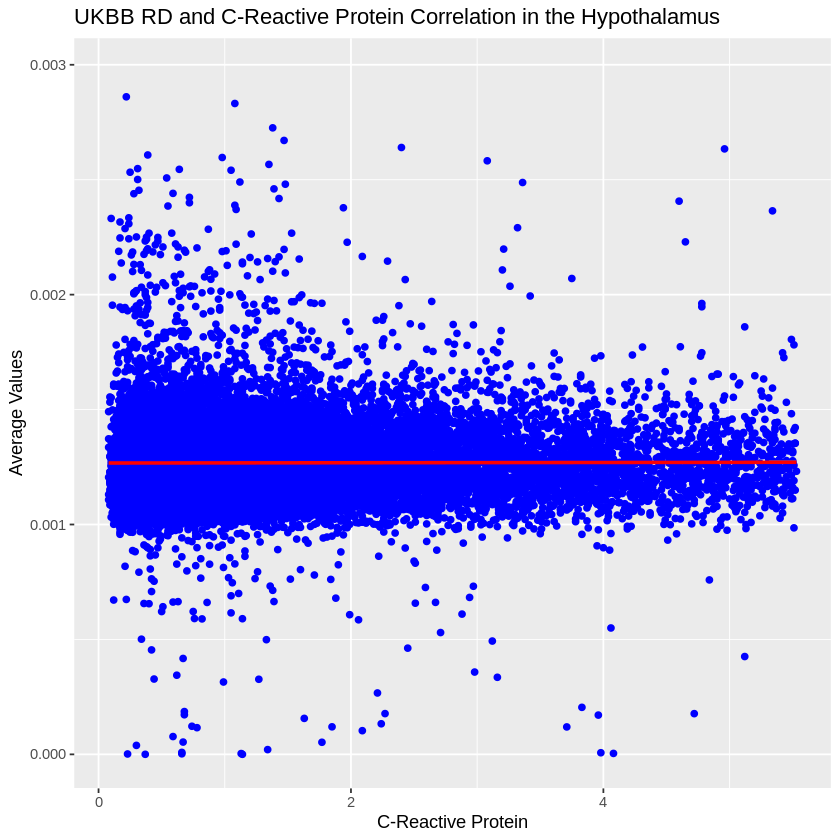

Warning message:
“Removed 2263 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 2263 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 26027 rows containing missing values (`geom_text()`).”


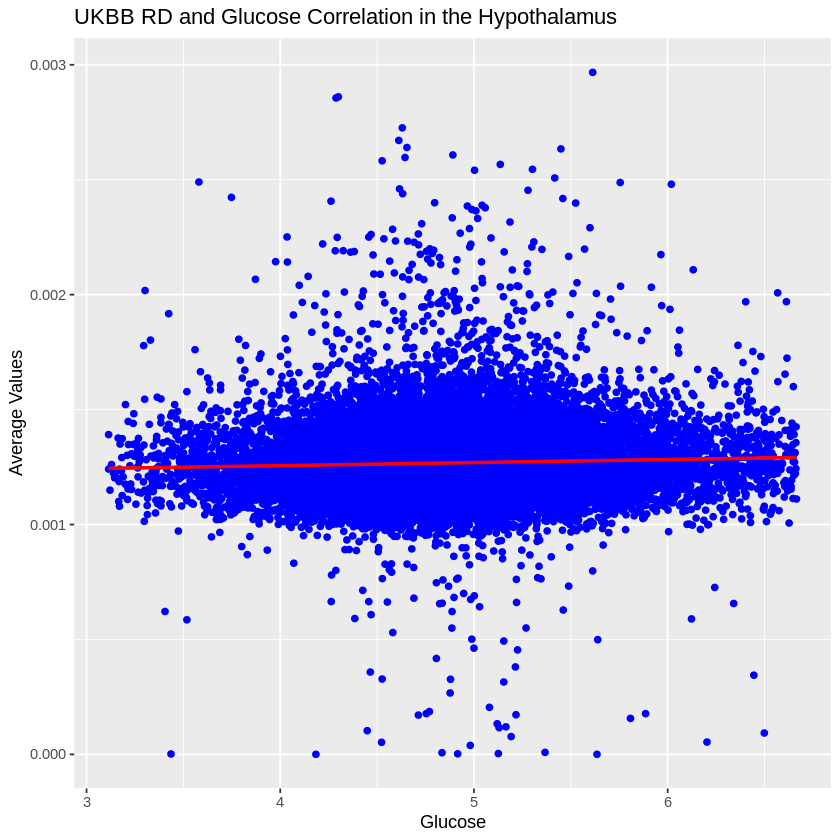

Warning message:
“Removed 1699 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 1699 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 26027 rows containing missing values (`geom_text()`).”


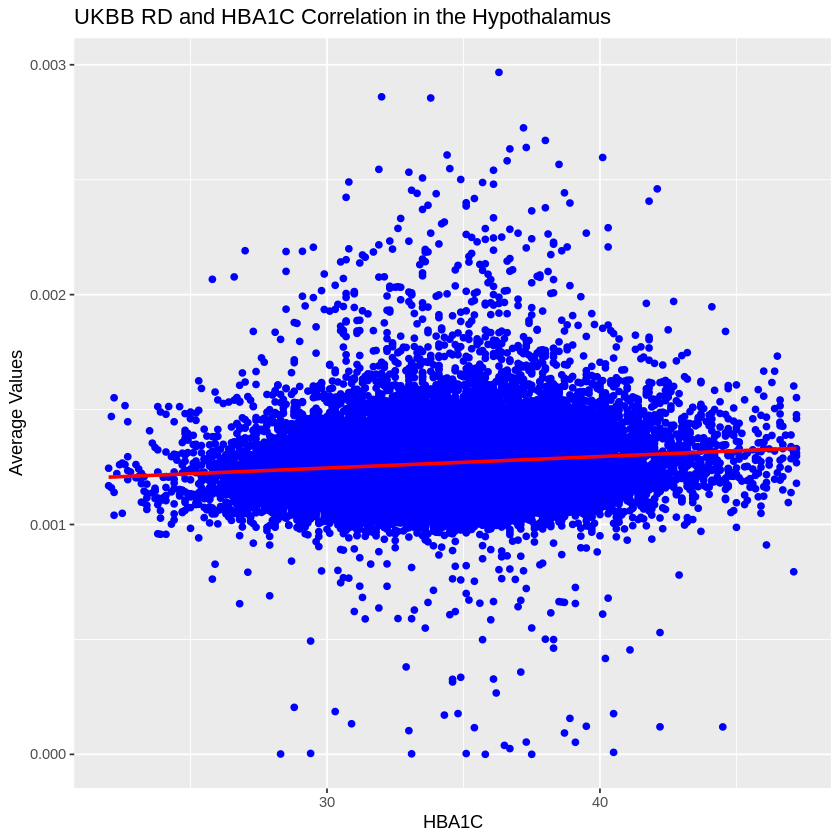

Warning message:
“Removed 1741 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 1741 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 26027 rows containing missing values (`geom_text()`).”


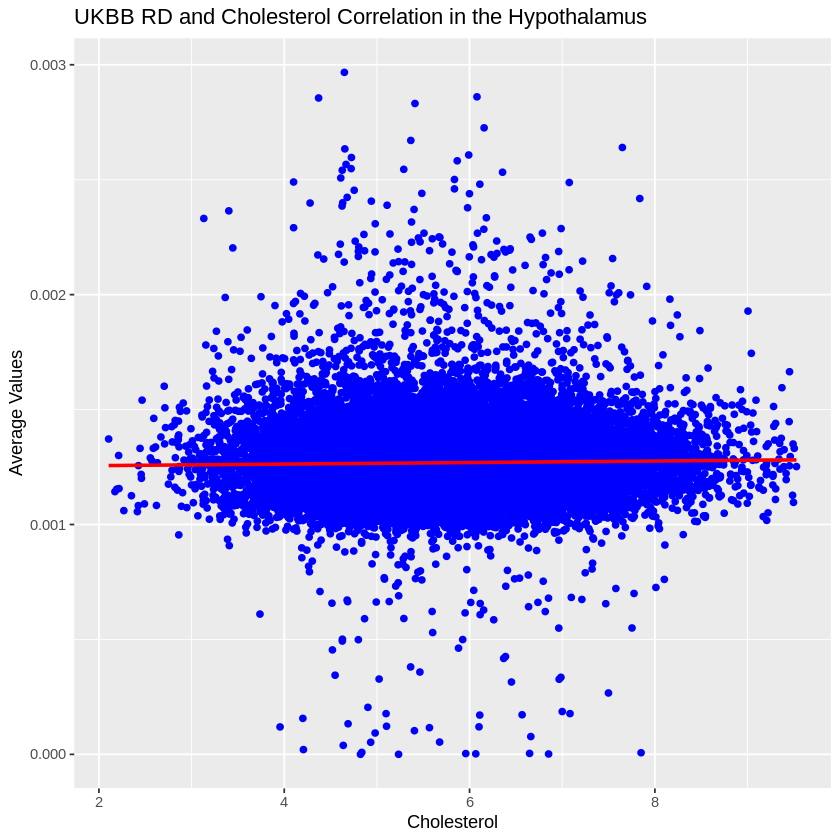

Warning message:
“Removed 3880 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 3880 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 26027 rows containing missing values (`geom_text()`).”


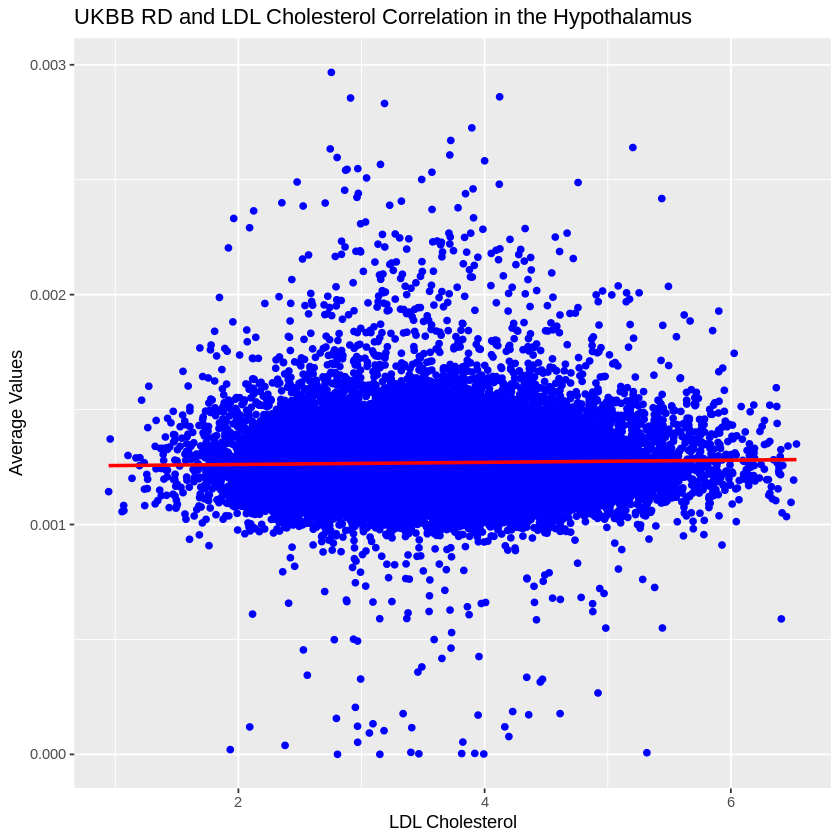

Warning message:
“Removed 2202 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 2202 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 26027 rows containing missing values (`geom_text()`).”


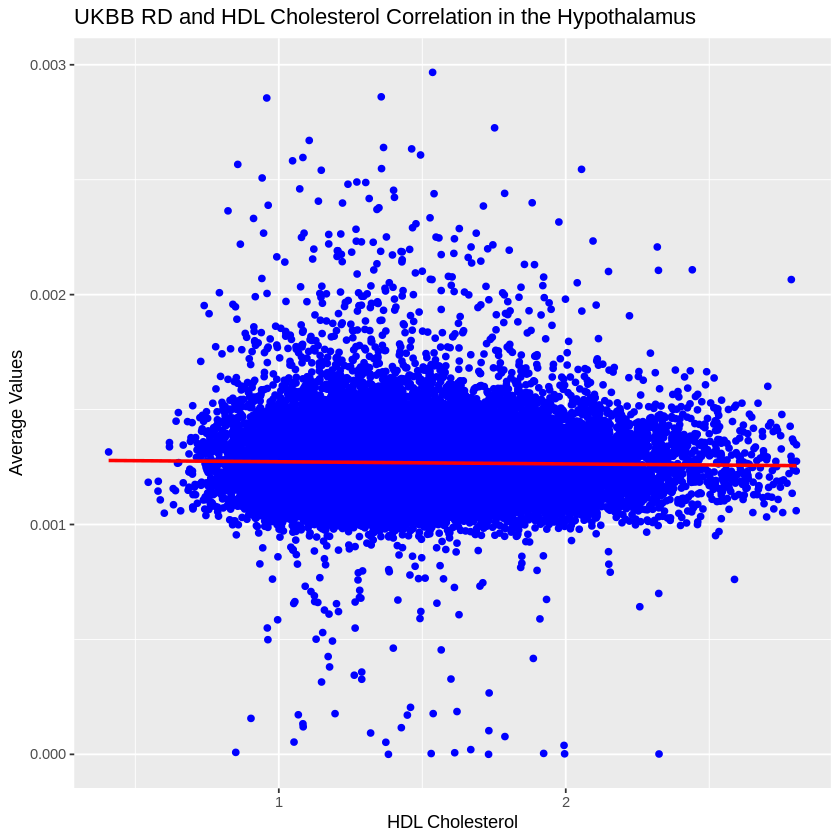

Warning message:
“Removed 2224 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 2224 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 26027 rows containing missing values (`geom_text()`).”


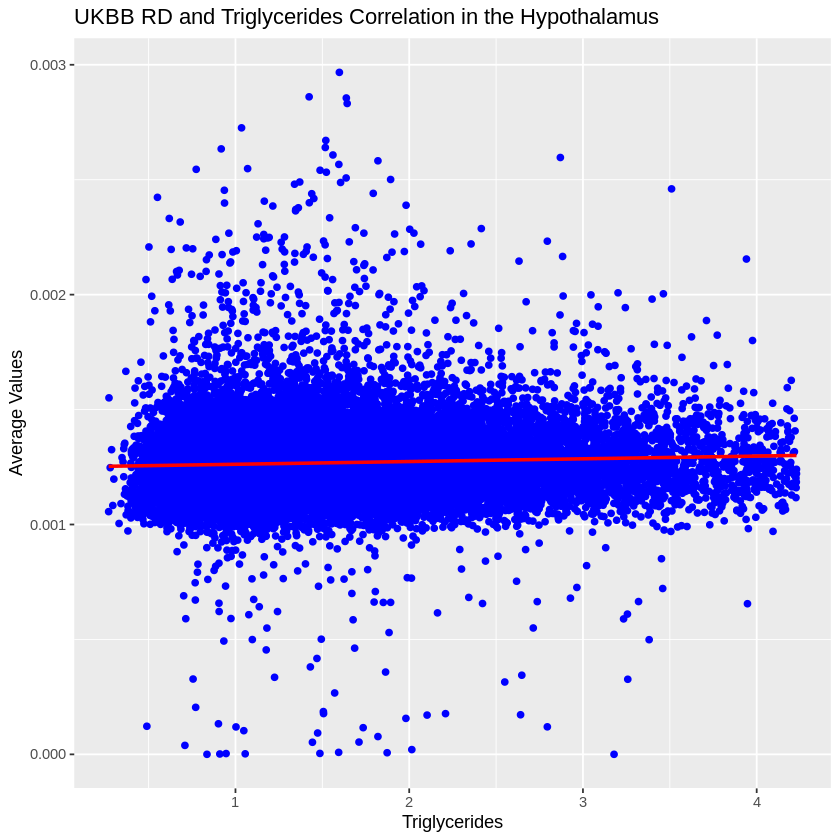

Warning message:
“Removed 2182 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 2182 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 26027 rows containing missing values (`geom_text()`).”


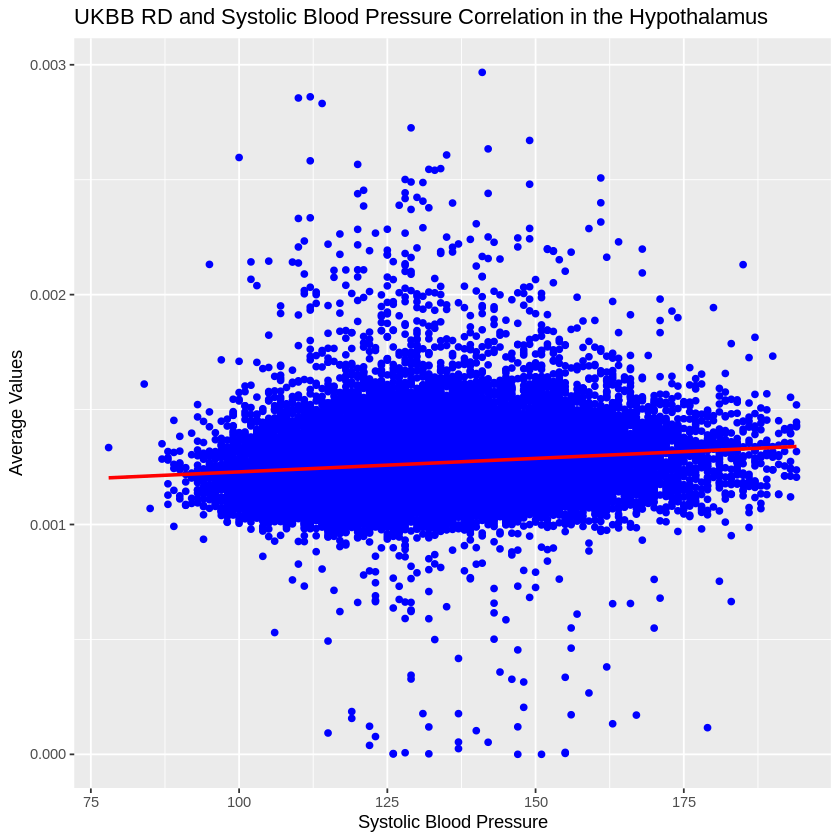

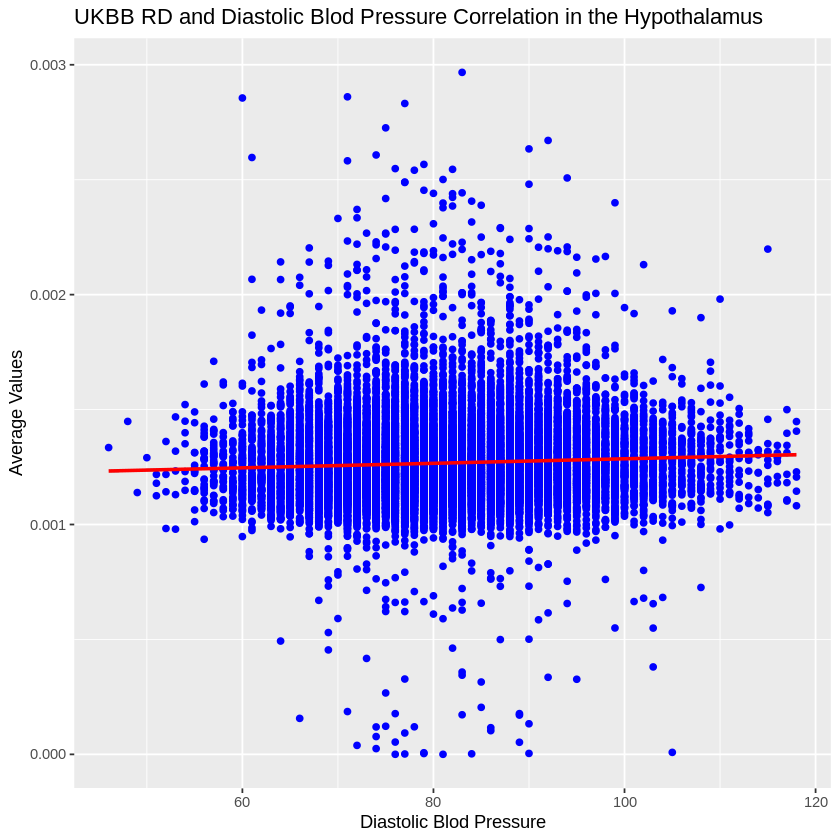

In [23]:
# Display RD plots
rd_c_reactive_plot
rd_glucose_plot
rd_hba1c_plot
rd_cholesterol_plot
rd_ldl_chol_plot
rd_hdl_chol_plot
rd_triglycerides_plot
rd_sys_bp_plot
rd_dia_bp_plot